## Pellet and Meal Analysis and Distribution

In [14]:
import sys
sys.path.insert(0, '../scripts')

import meals as ml
import tools as tl
import paths
from preprocessing import read_csv_clean

time_threshold = 60
pellet_threshold = 3

### Control Group

[71.42857142857143, 11.428571428571429, 80.0, 62.5, 66.66666666666666]


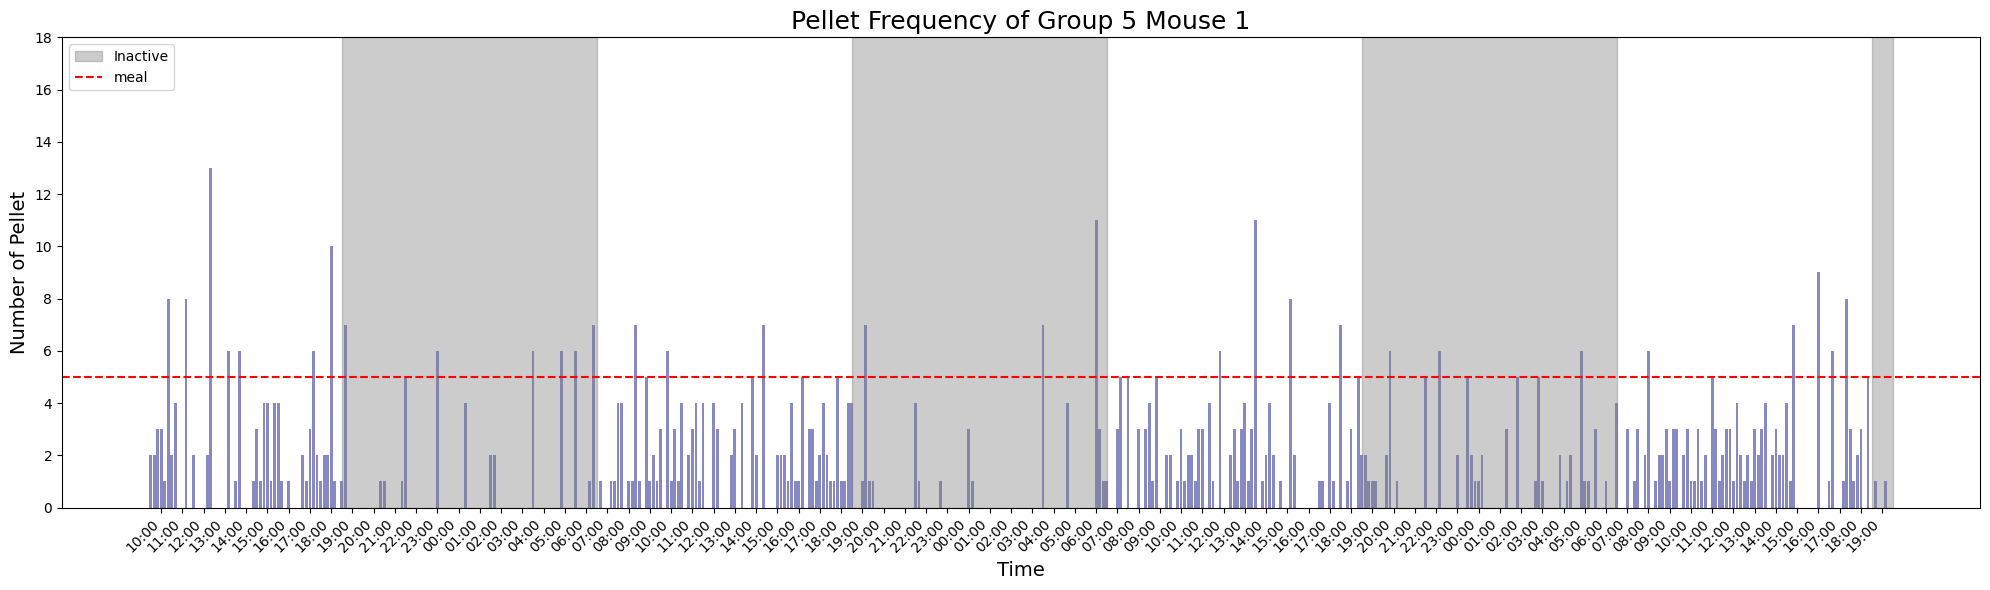

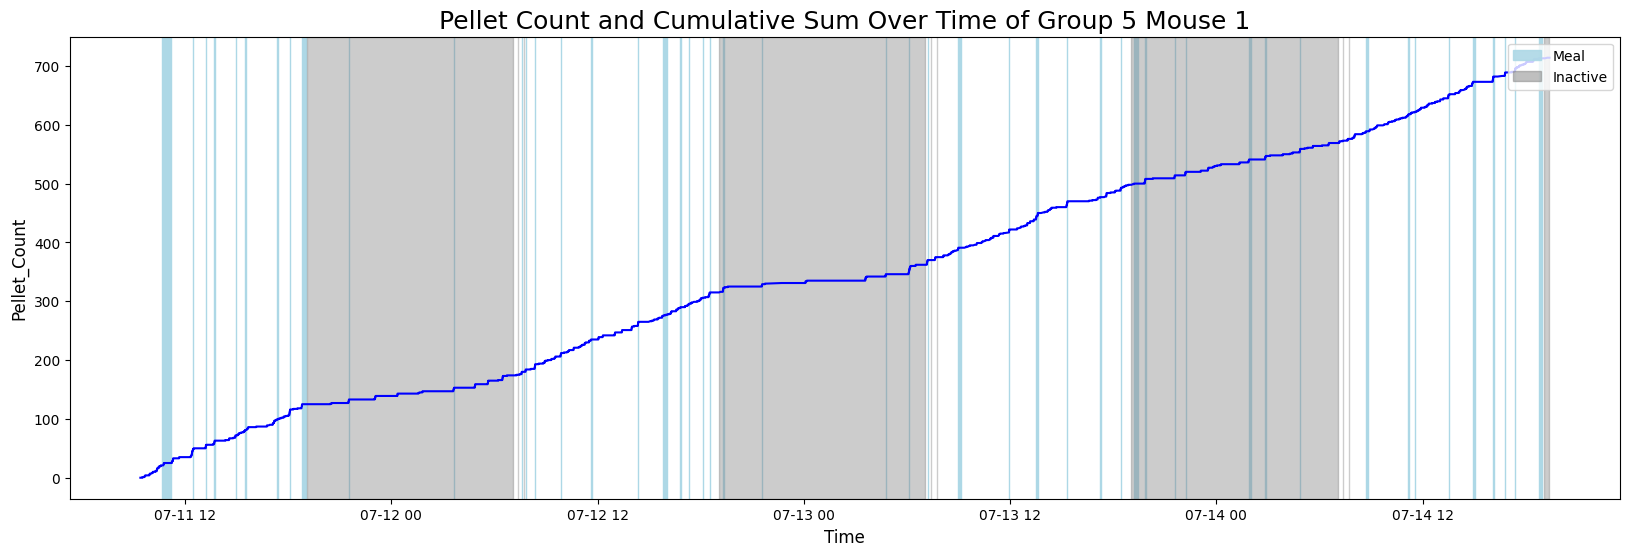

[100.0, 100.0, 55.55555555555556, 100.0, 100.0]


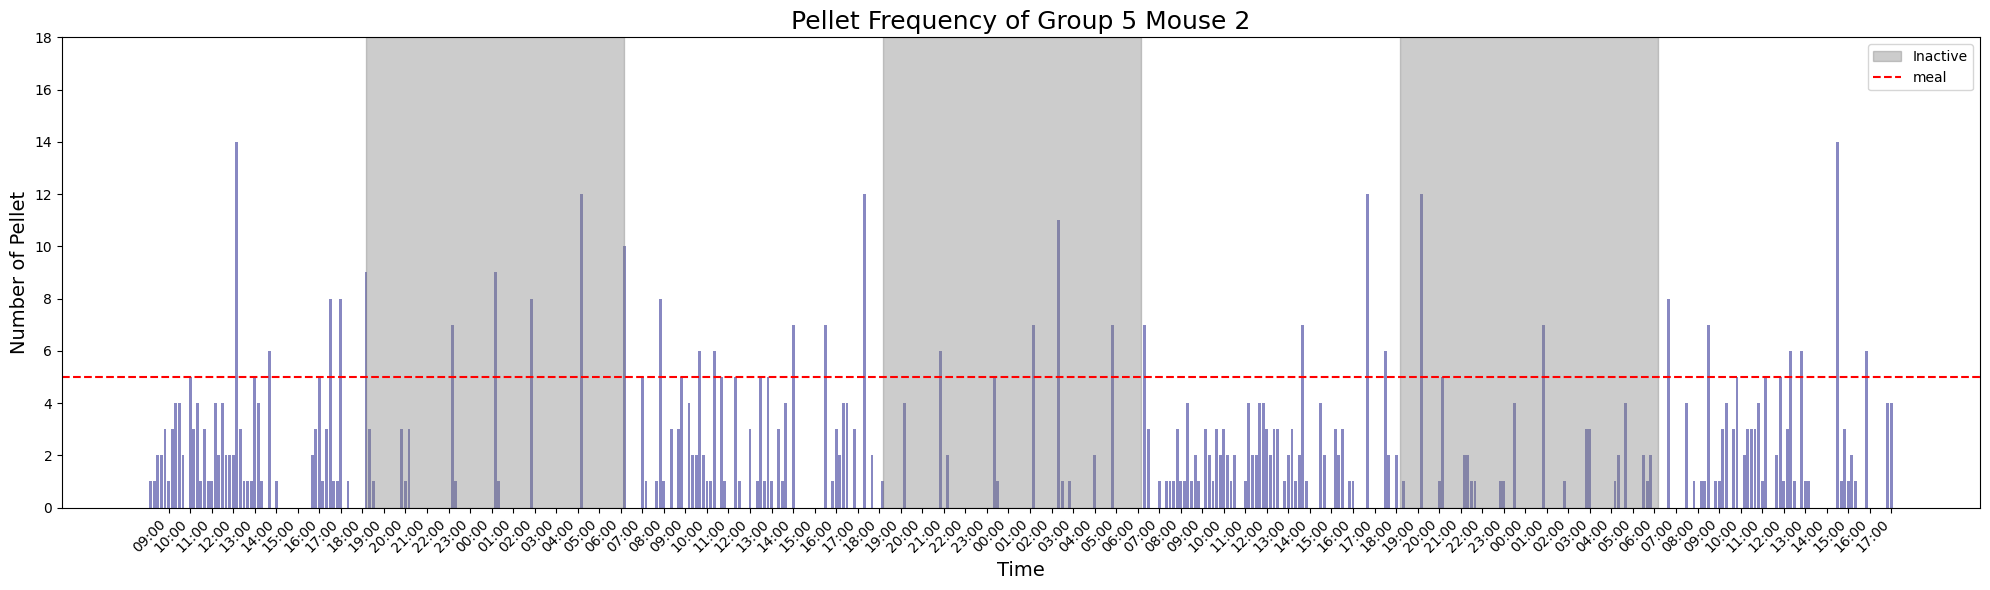

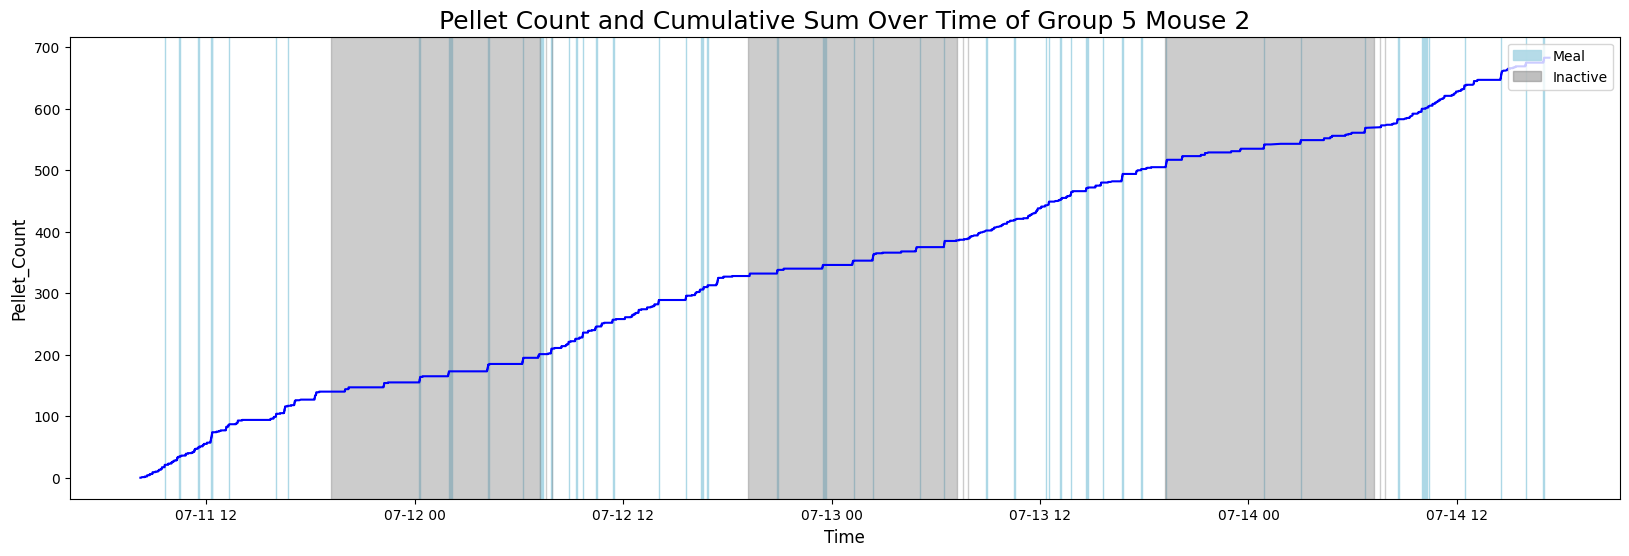

[68.75, 100.0, 100.0, 35.294117647058826, 66.66666666666666]


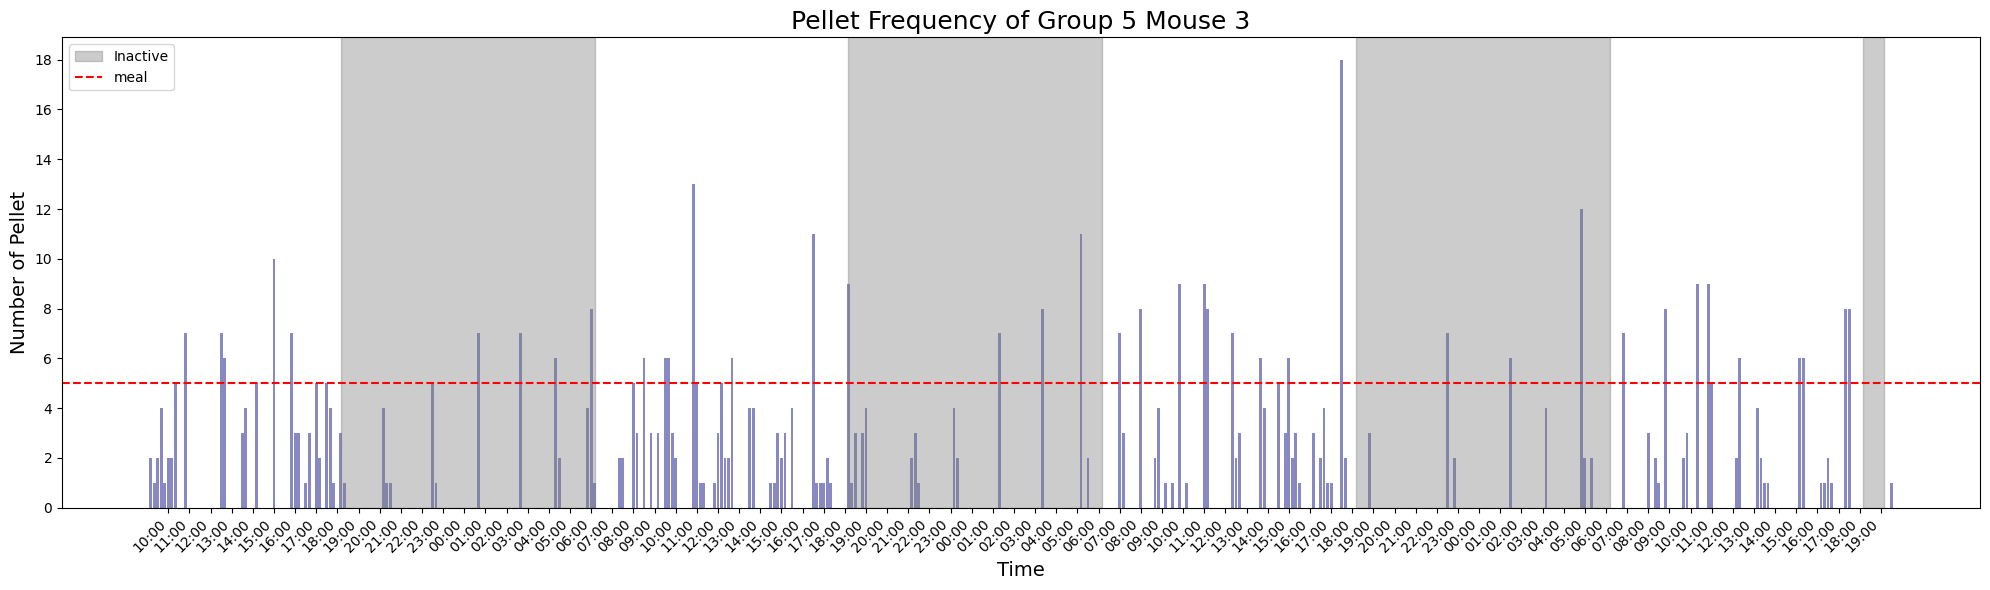

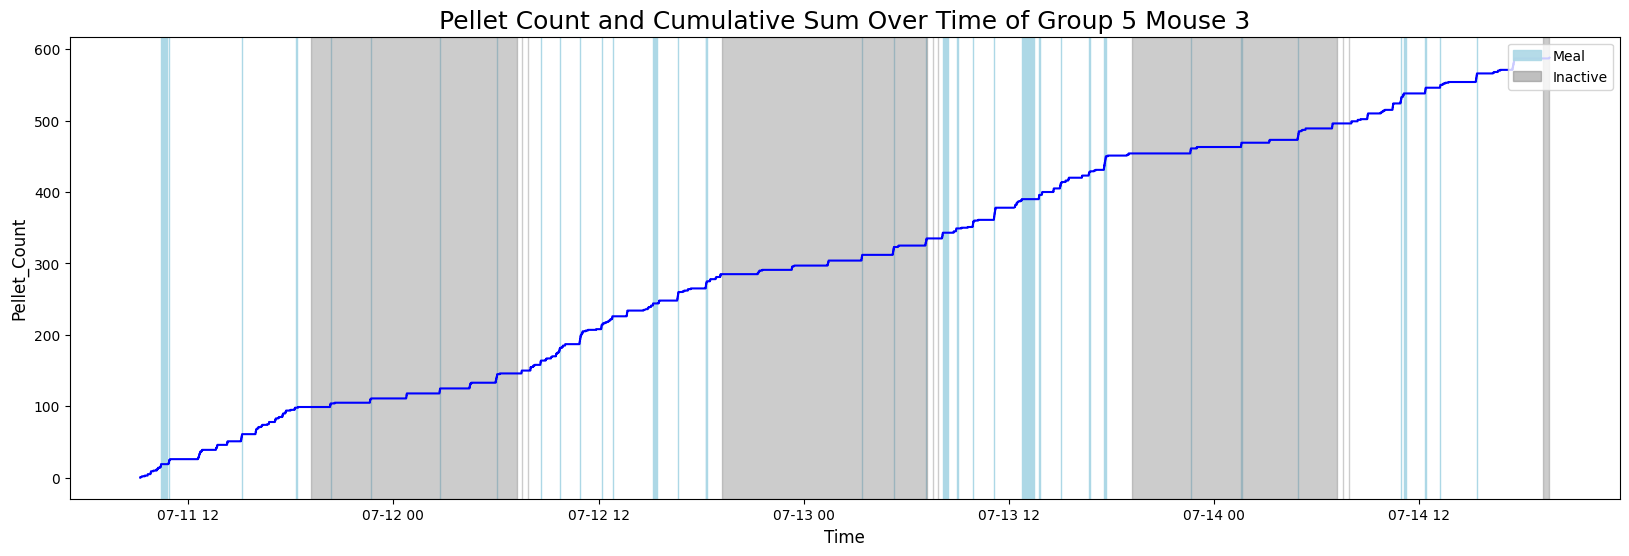

[83.33333333333334, 100.0, 100.0, 31.25, 60.0]


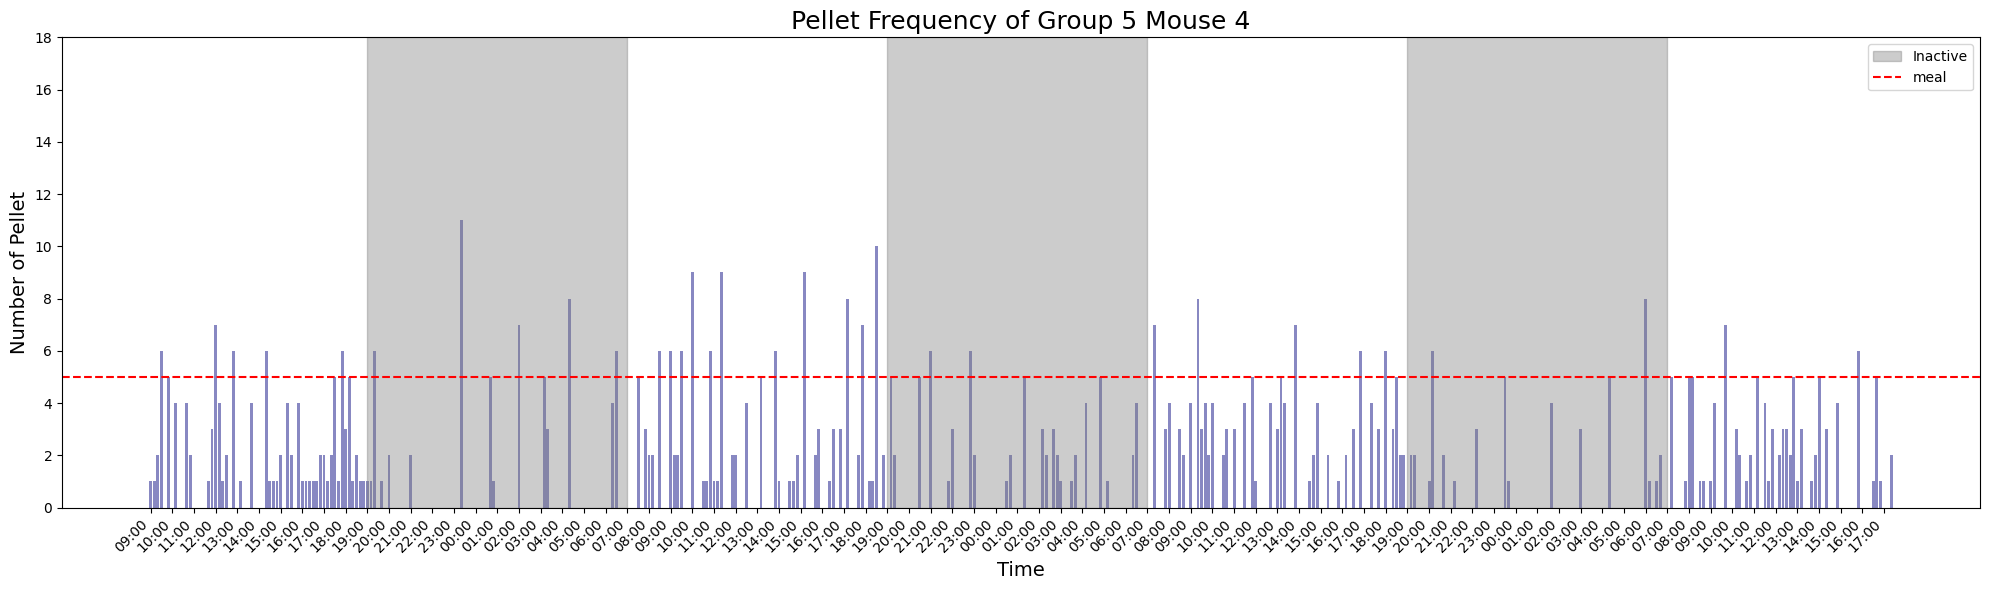

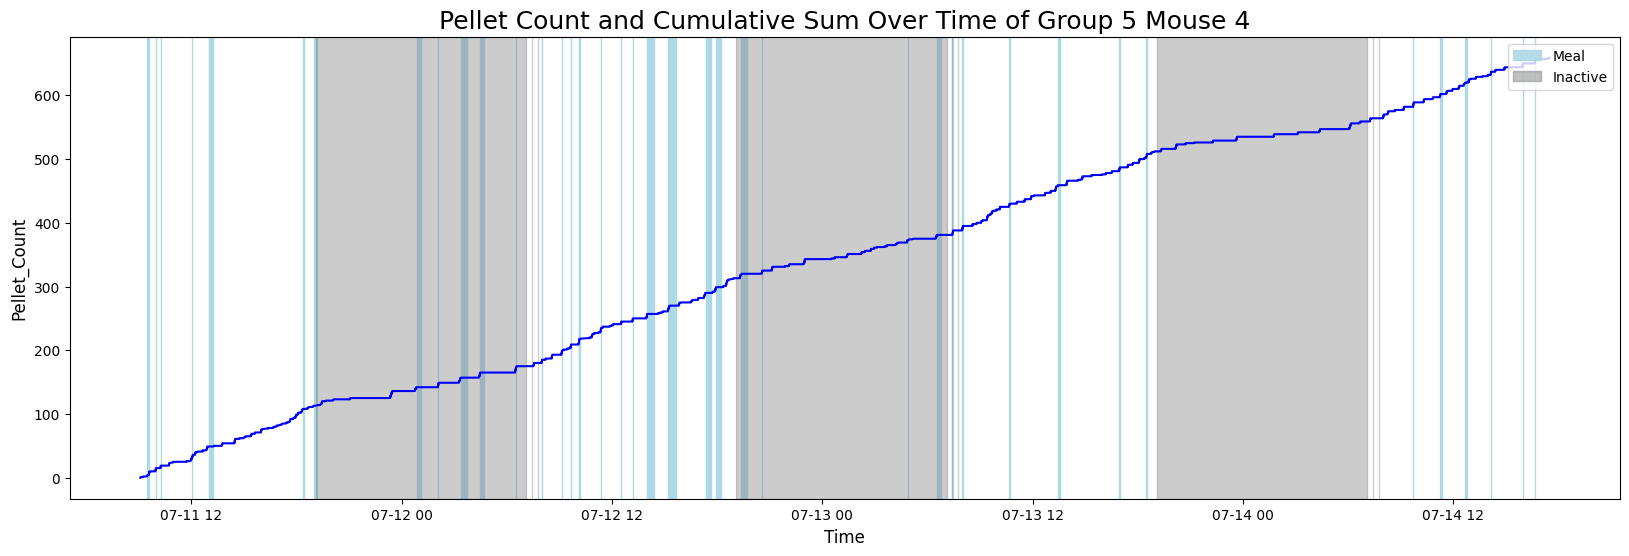

[100.0, 42.857142857142854, 35.294117647058826, 19.047619047619047, 62.5]


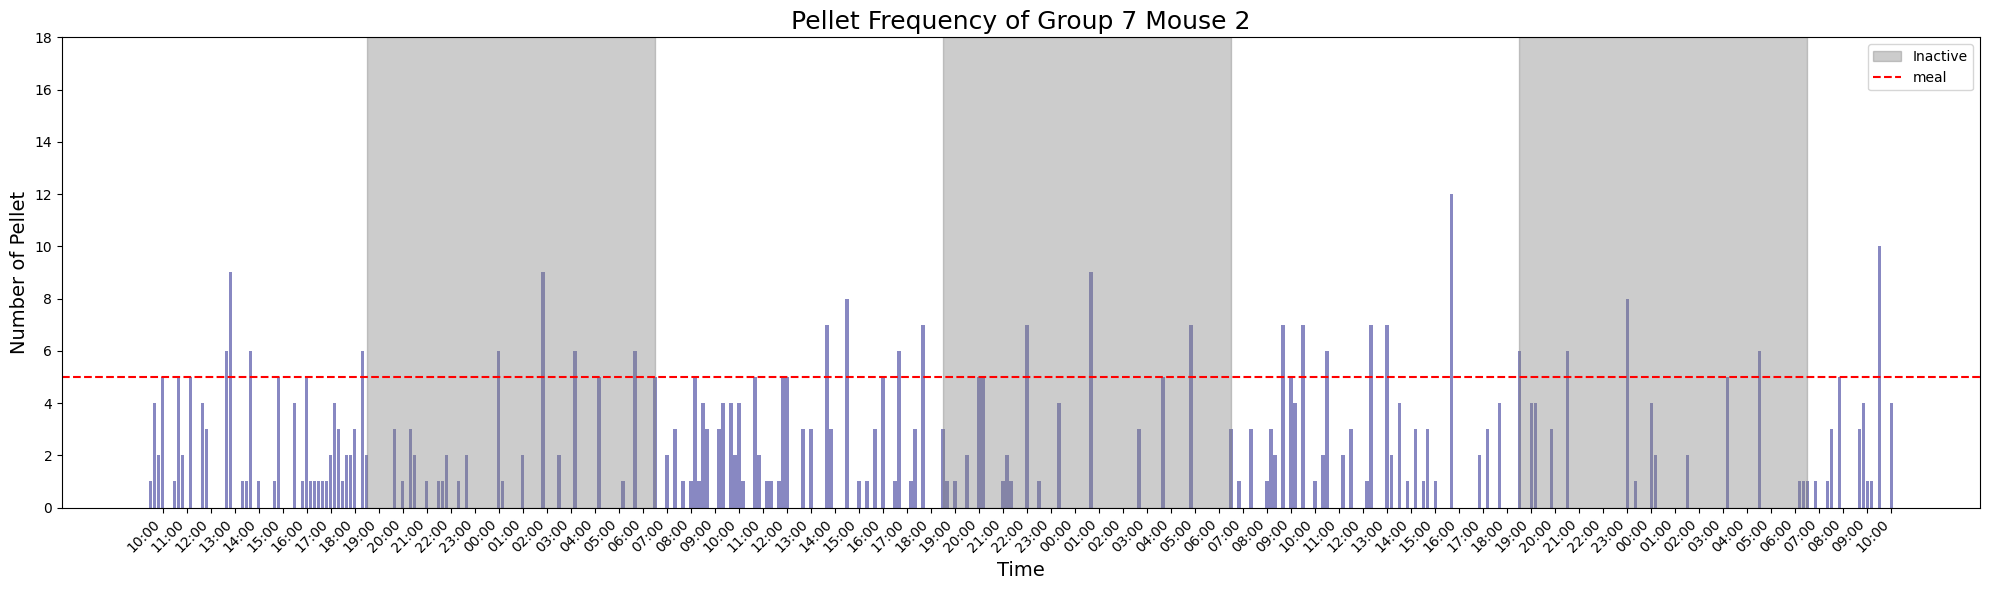

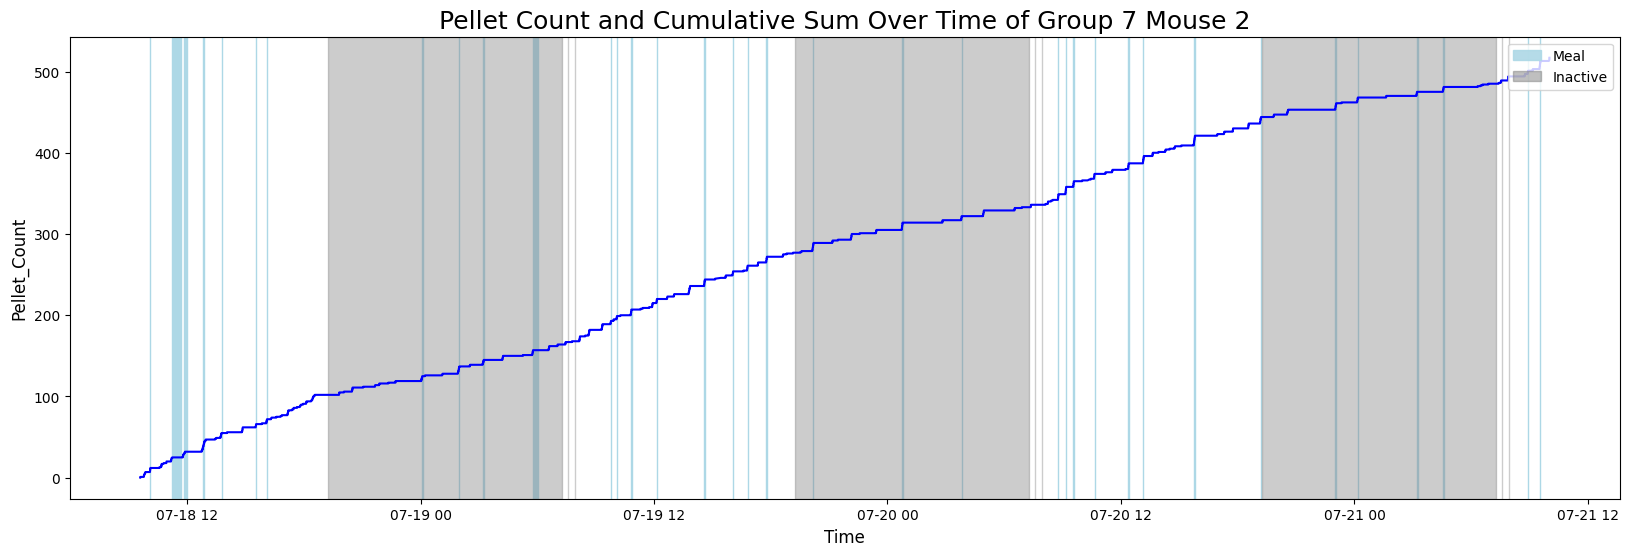

[100.0, 100.0, 50.0, 46.15384615384615, 100.0]


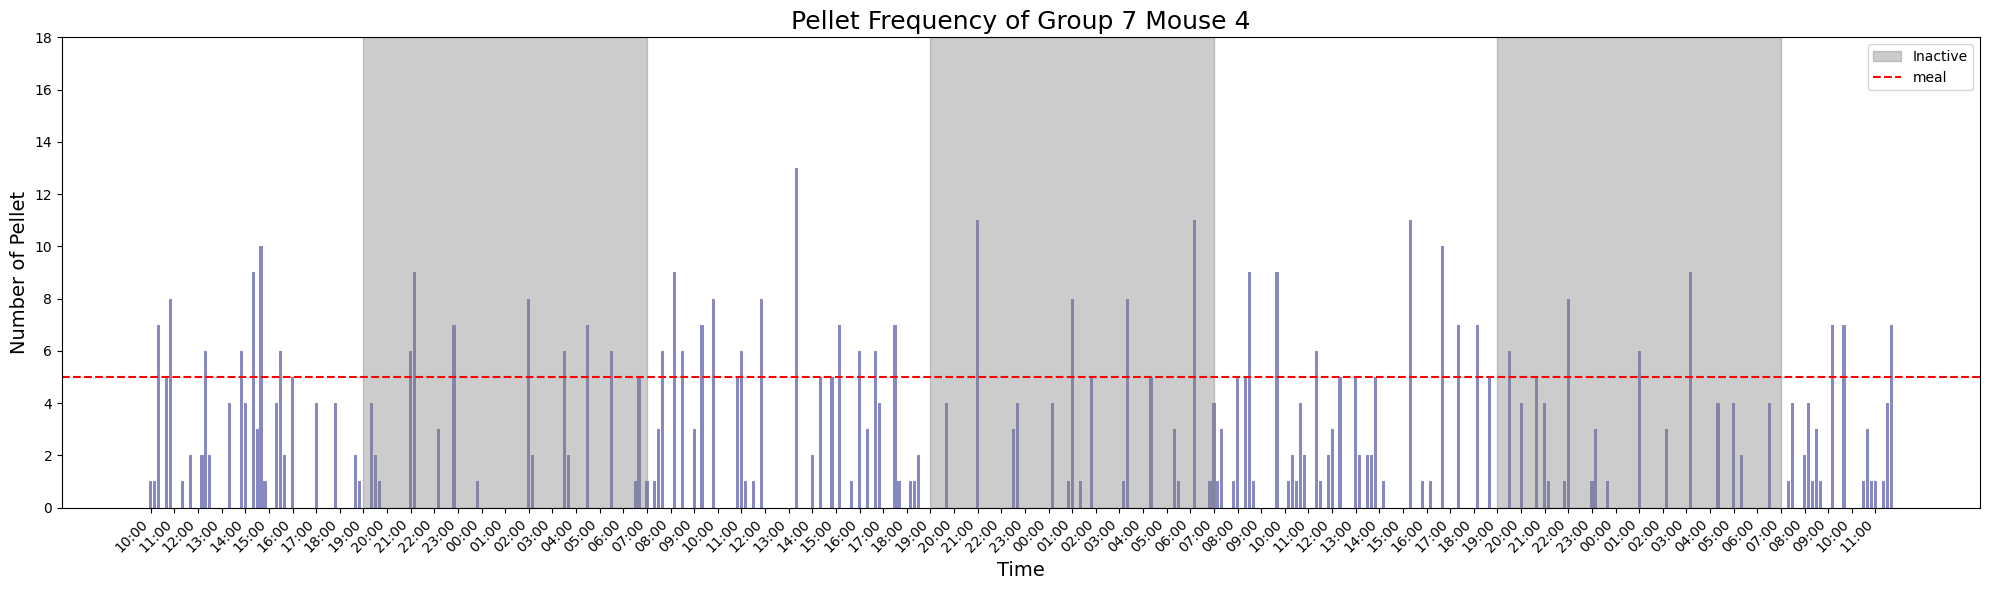

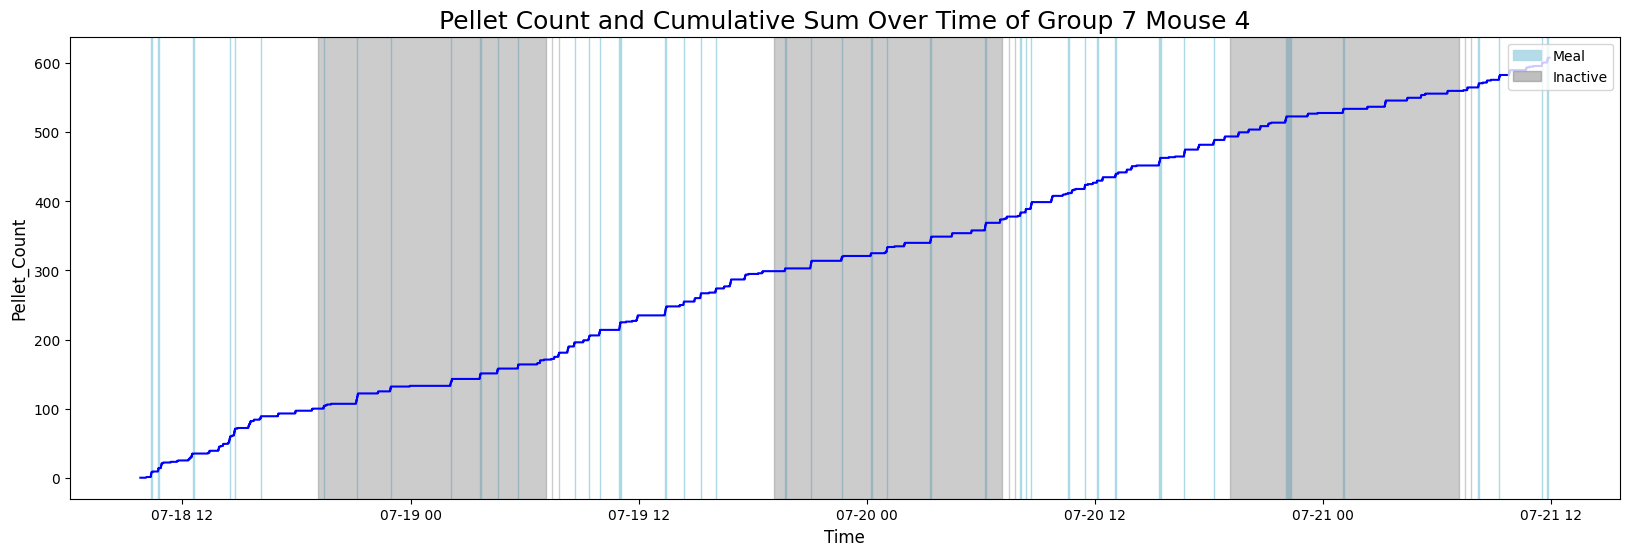

In [15]:
ctrl_avg_pellet = [] # pellet per hour
ctrl_dark_meals = [] # percentage of meals in inactive/dark phase
ctrl_fir_meal = []
flip_ctrl_meal_count = []

for path in paths.contigency_flip_ctrl:
    data = read_csv_clean(path, remove_trivial=False, collect_time=True)
    # meal = ml.find_meals(data, pellet_count_threshold=pellet_count_threshold, 
    #                      collect_quantile=collect_quantile, pellet_quantile=pellet_quantile)
    meal, meal_pellet_cnt, meal_acc = ml.find_meals_paper(data, time_threshold=time_threshold, pellet_threshold=pellet_threshold)
    val_idx = next((i for i, x in enumerate(meal_acc) if x >= 60), -1) # find first meal that has >60% accuracy
    meal_1 = (meal[0][0] - data['Time'][0]).total_seconds() / 60
    group = ml.pellet_flip(data)
    bhv, num = tl.get_bhv_num(path)
    avg = round(len(meal) / ml.experiment_duration(data), 2)
    flip_ctrl_meal_count.append(avg)
    ctrl_avg_pellet.append(ml.average_pellet(group))
    ctrl_dark_meals.append(ml.active_meal(meal))
    ctrl_fir_meal.append(meal_1)
    print(meal_acc[:5])
    ml.graph_pellet_frequency(group, bhv, num)
    ml.graphing_cum_count(data, meal, bhv, num, flip=True)
# # meal

### Cask Group

[100.0, 100.0, 92.3076923076923, 20.0, 34.61538461538461]


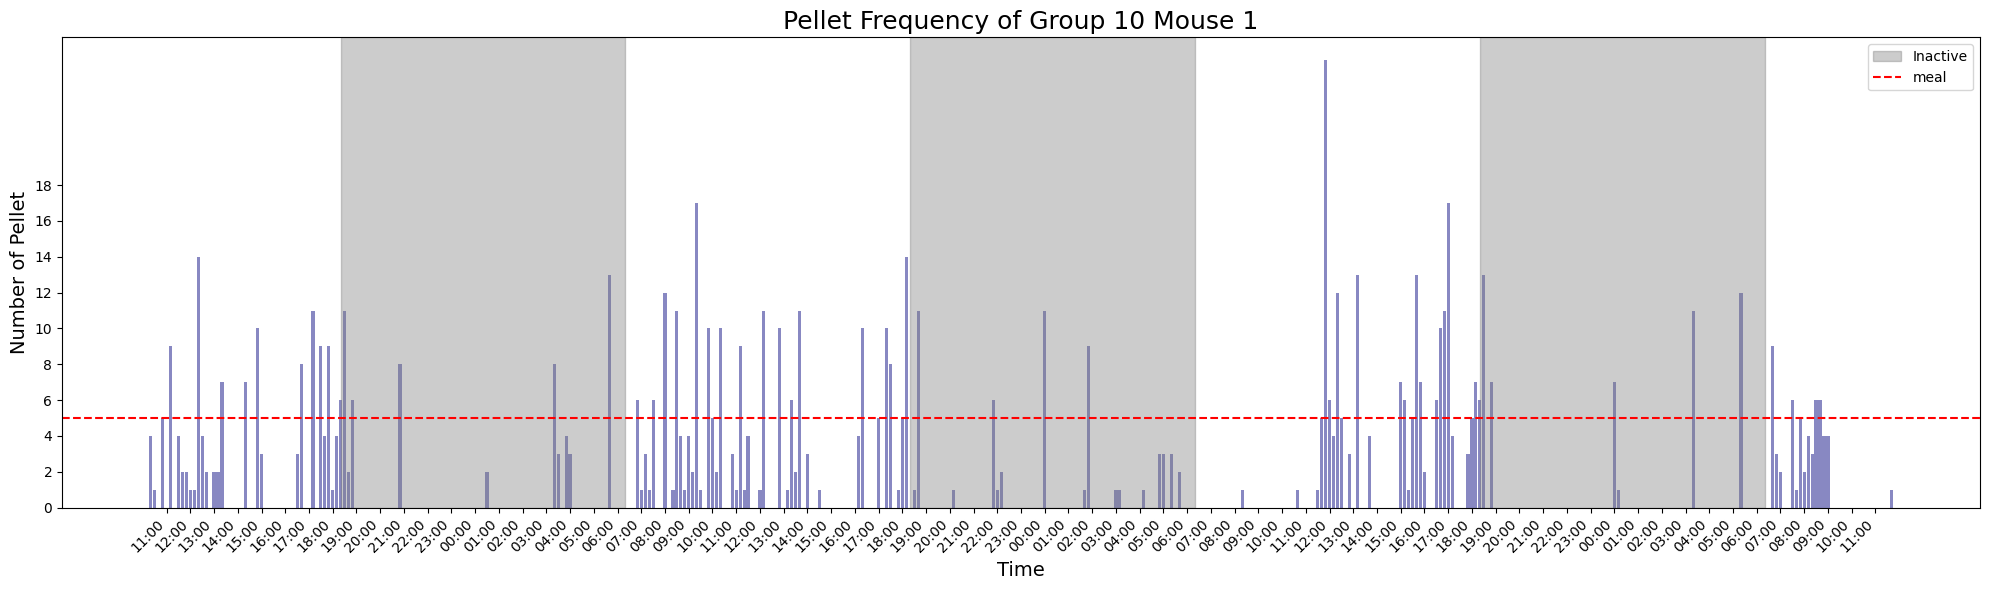

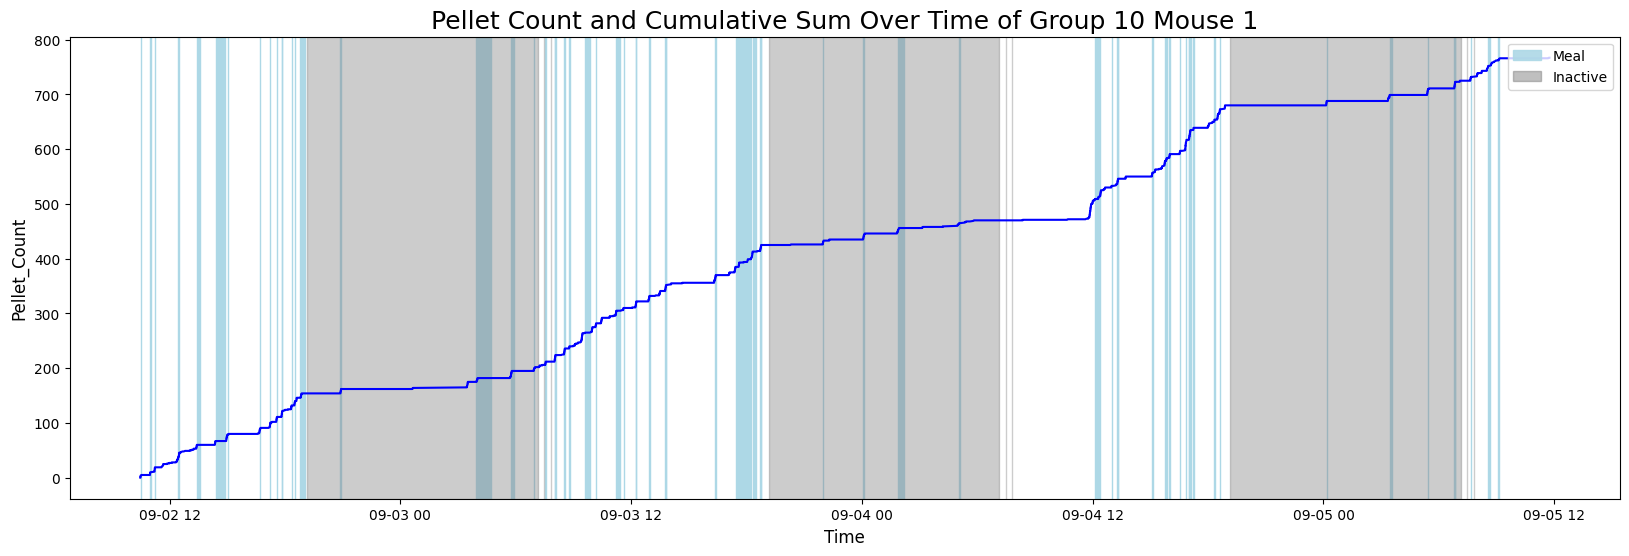

[100.0, 77.96610169491525, 11.363636363636363, 66.66666666666666, 100.0]


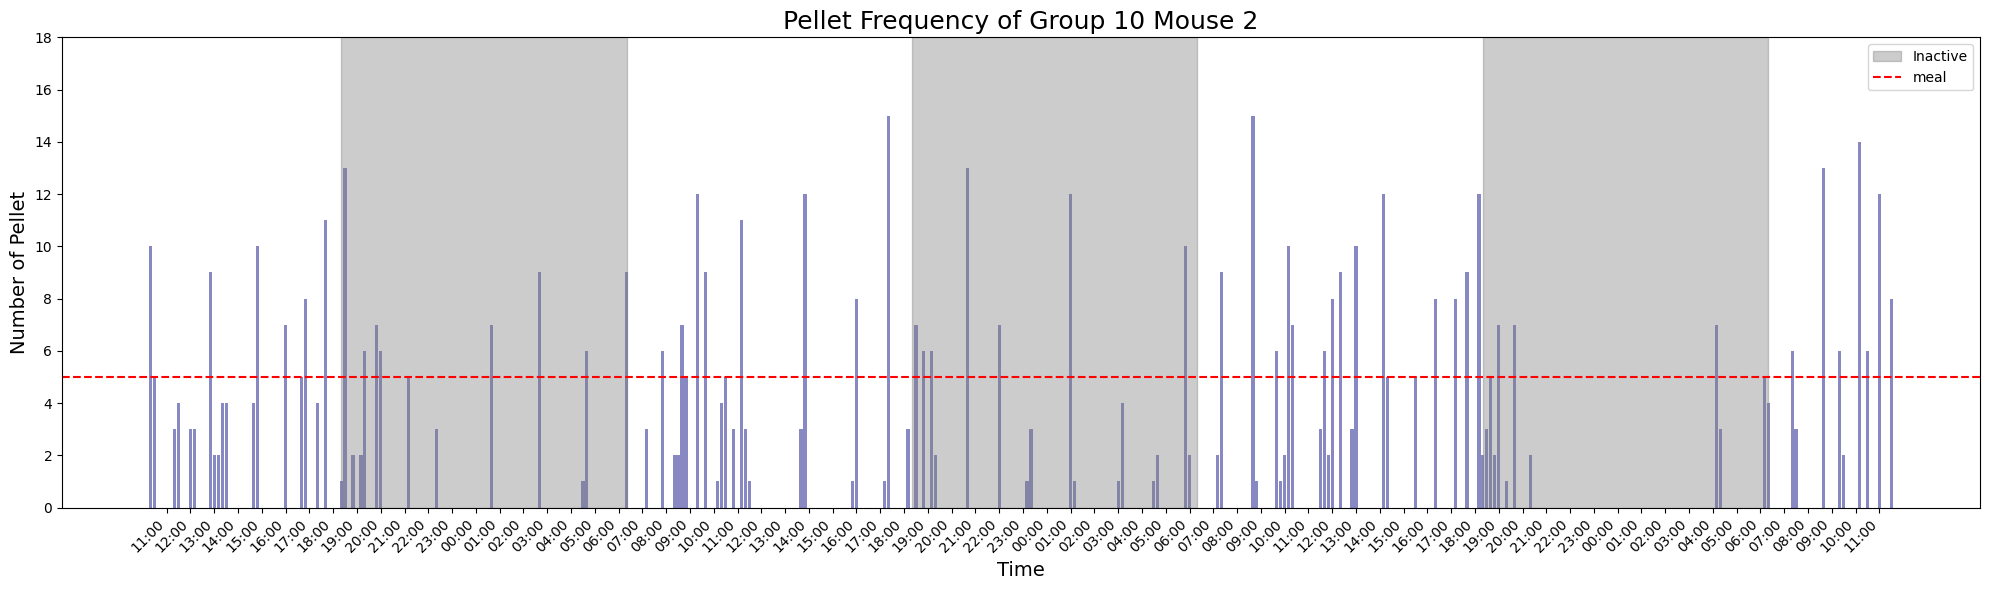

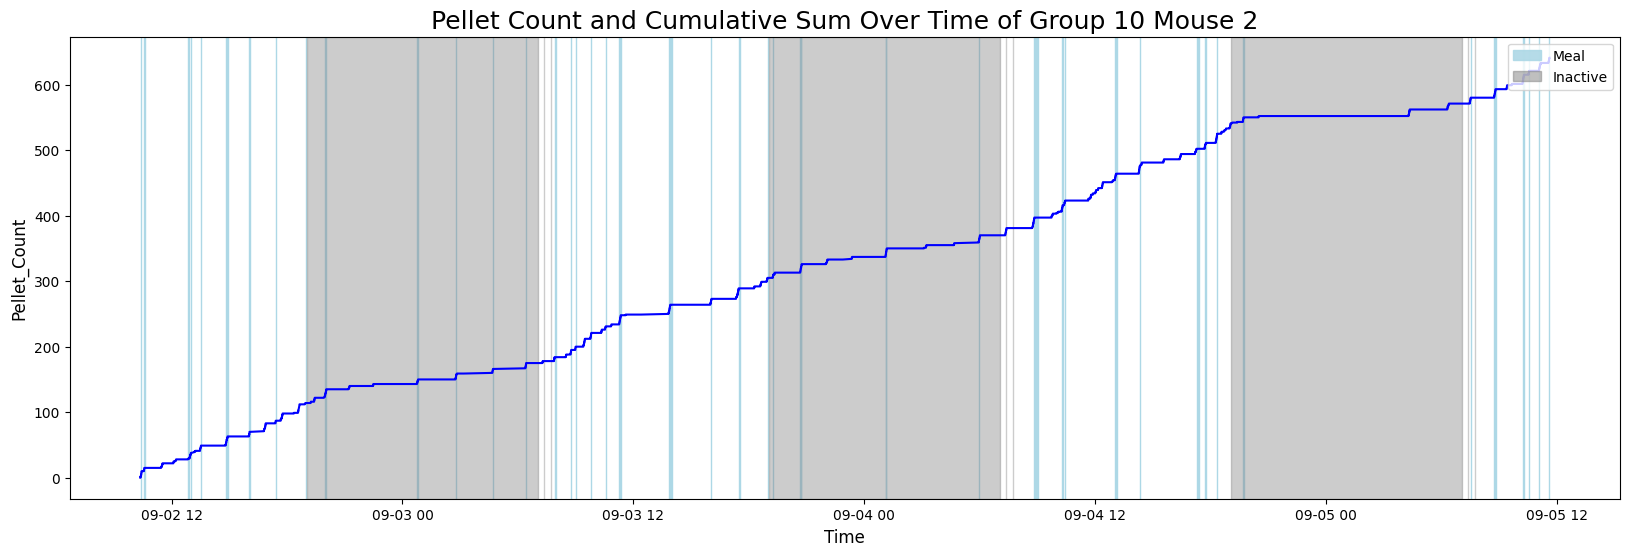

[100.0, 5.555555555555555, 10.526315789473683, 38.095238095238095, 41.17647058823529]


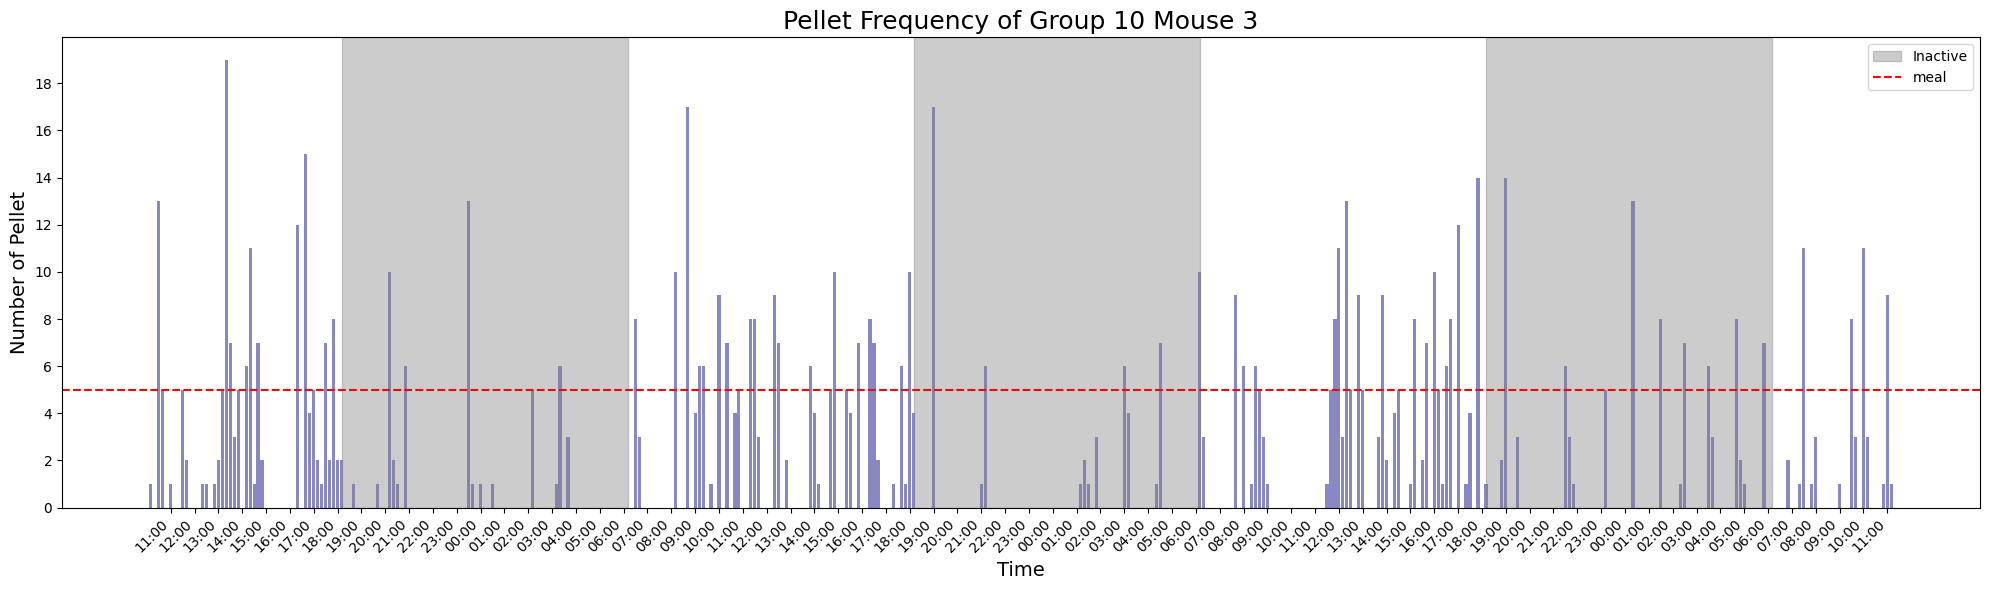

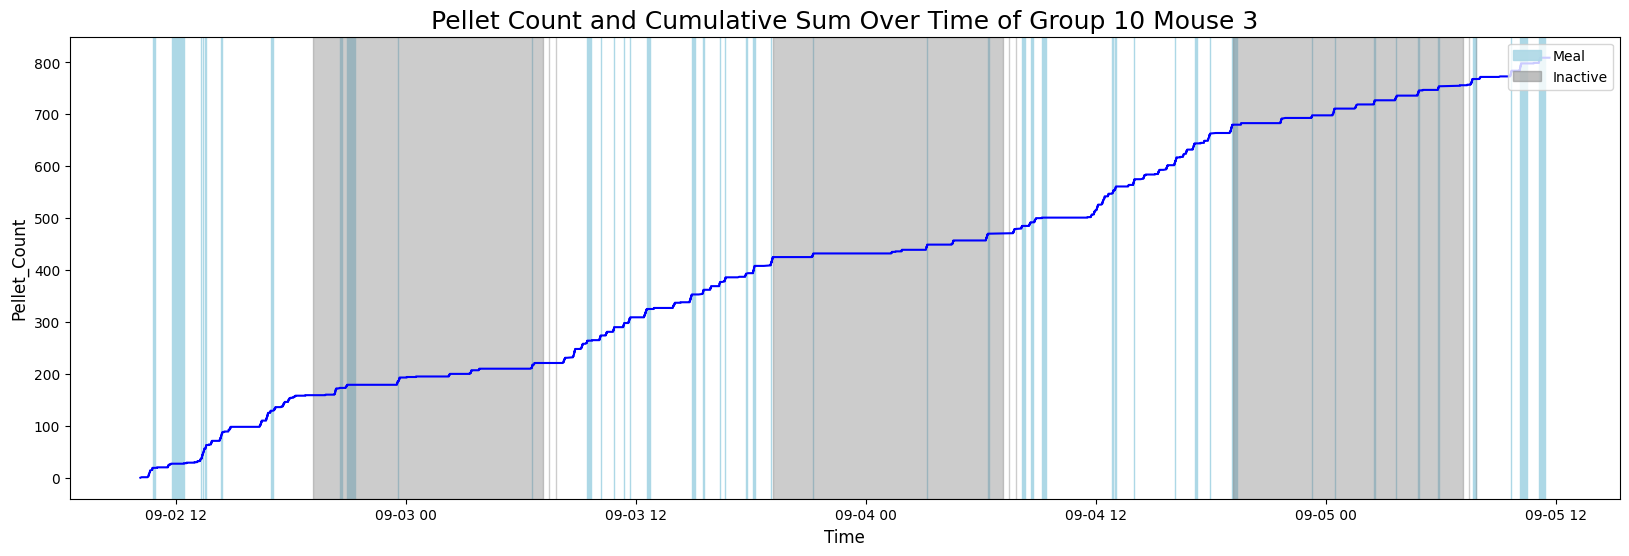

[95.65217391304348, 100.0, 26.923076923076923, 80.0, 100.0]


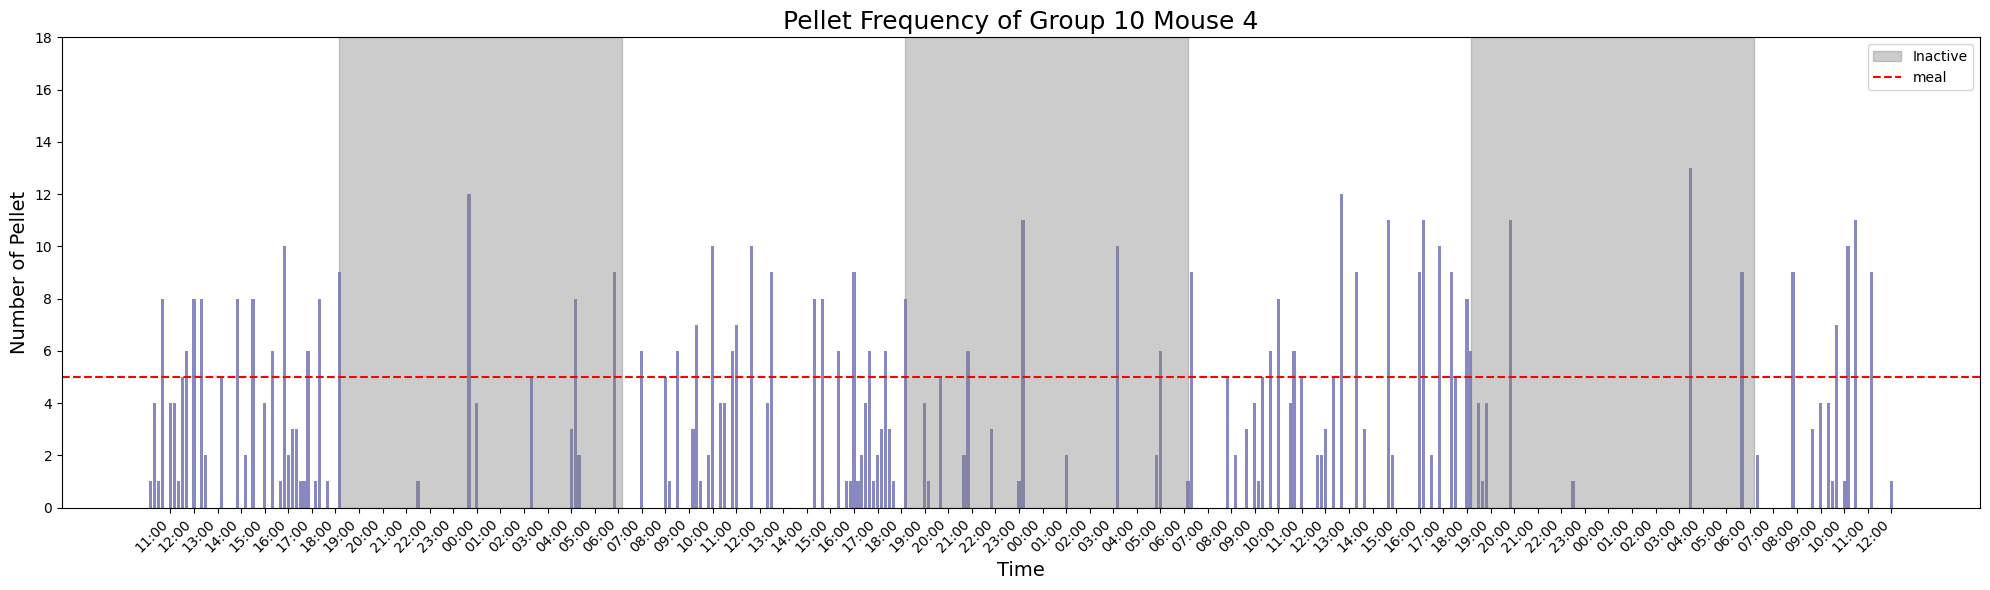

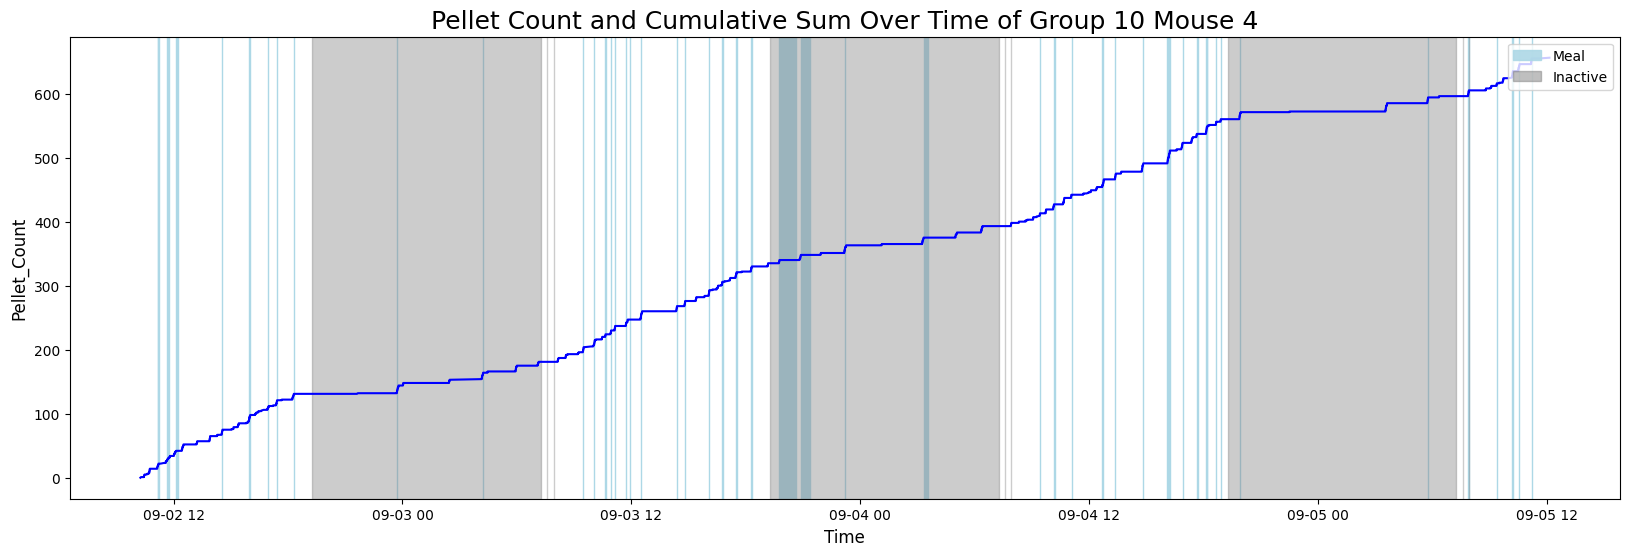

[100.0, 100.0, 100.0, 100.0, 82.35294117647058]


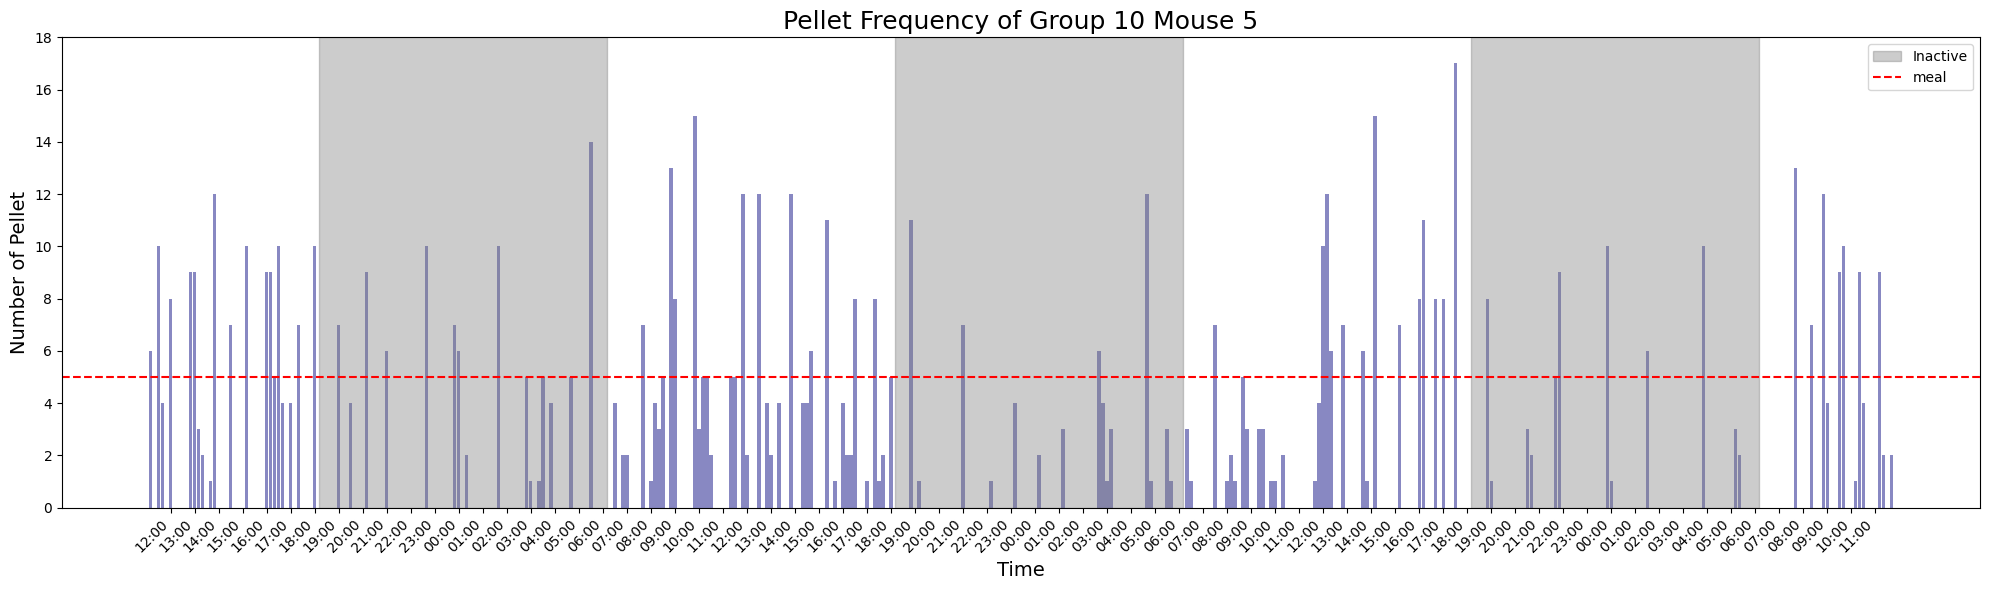

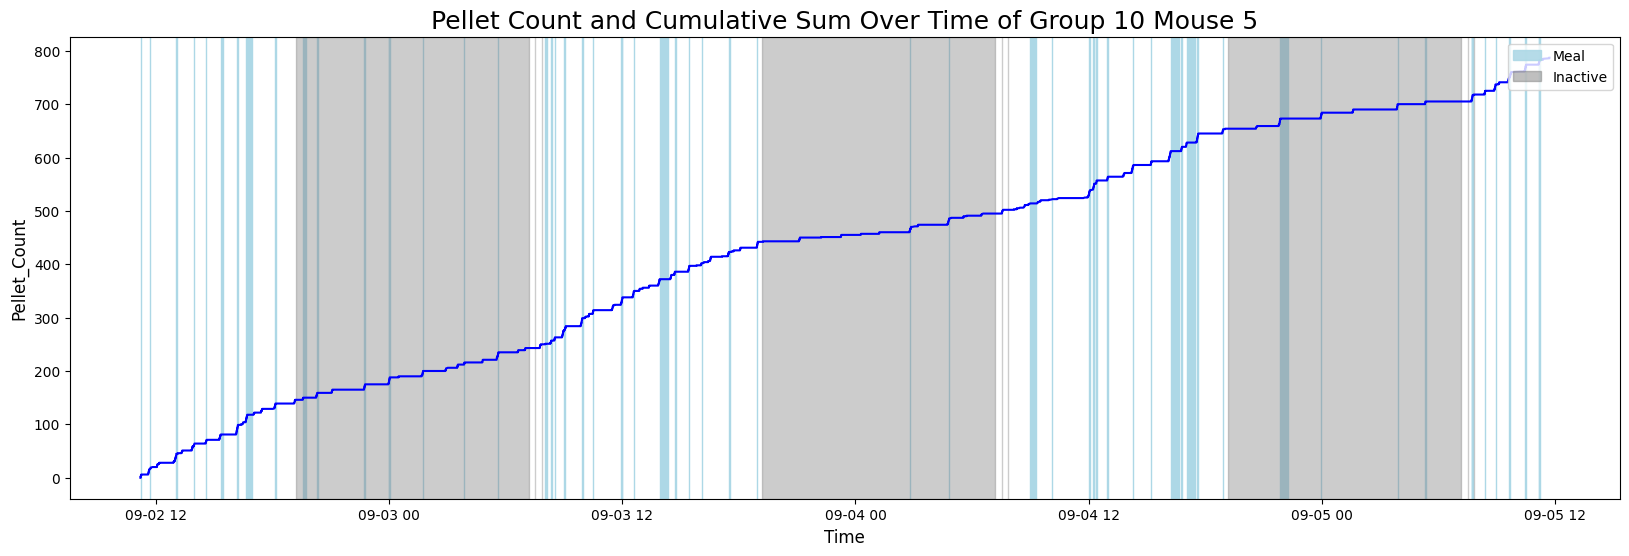

[100.0, 100.0, 80.0, 50.0, 90.9090909090909]


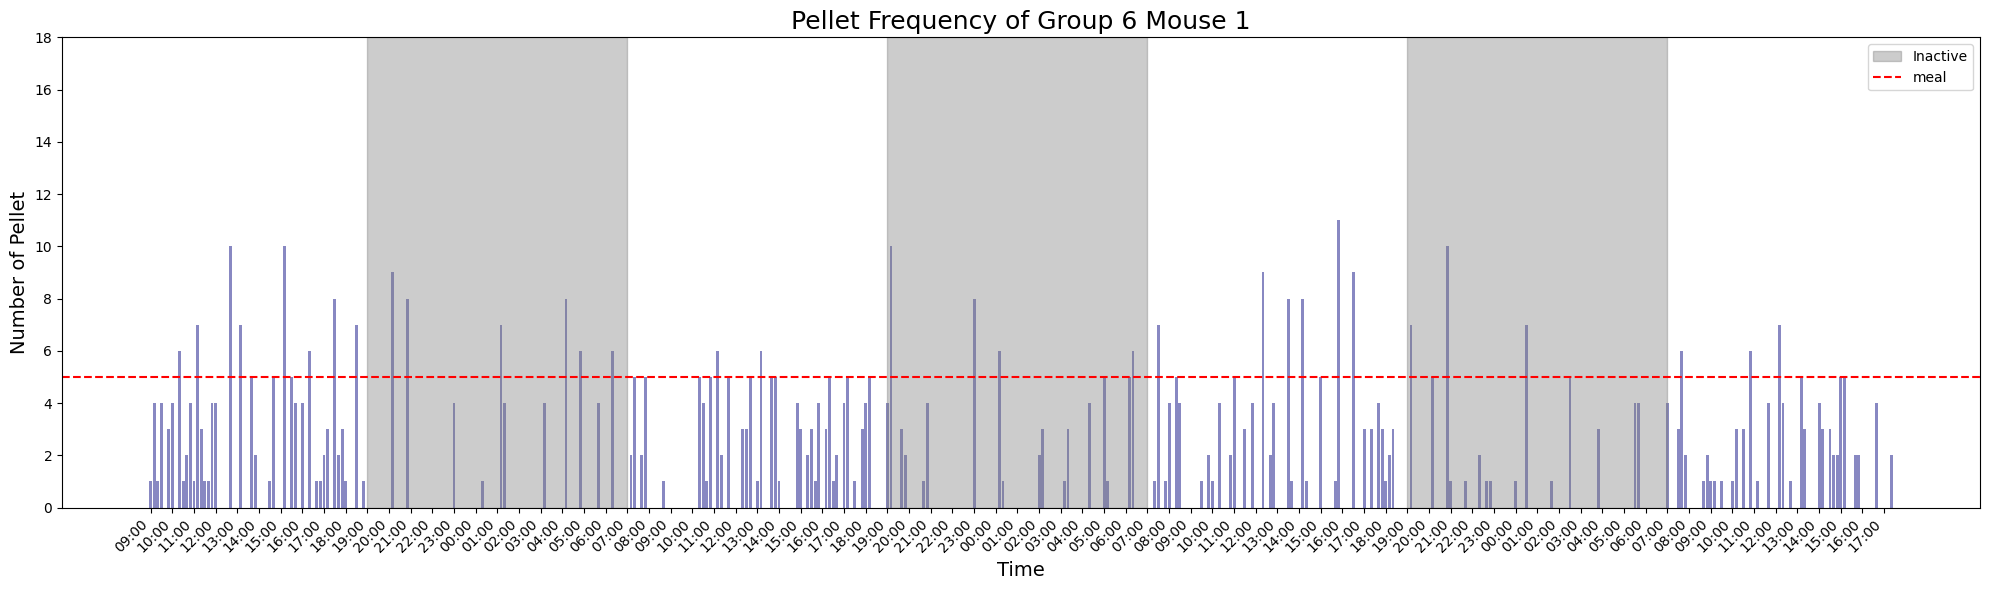

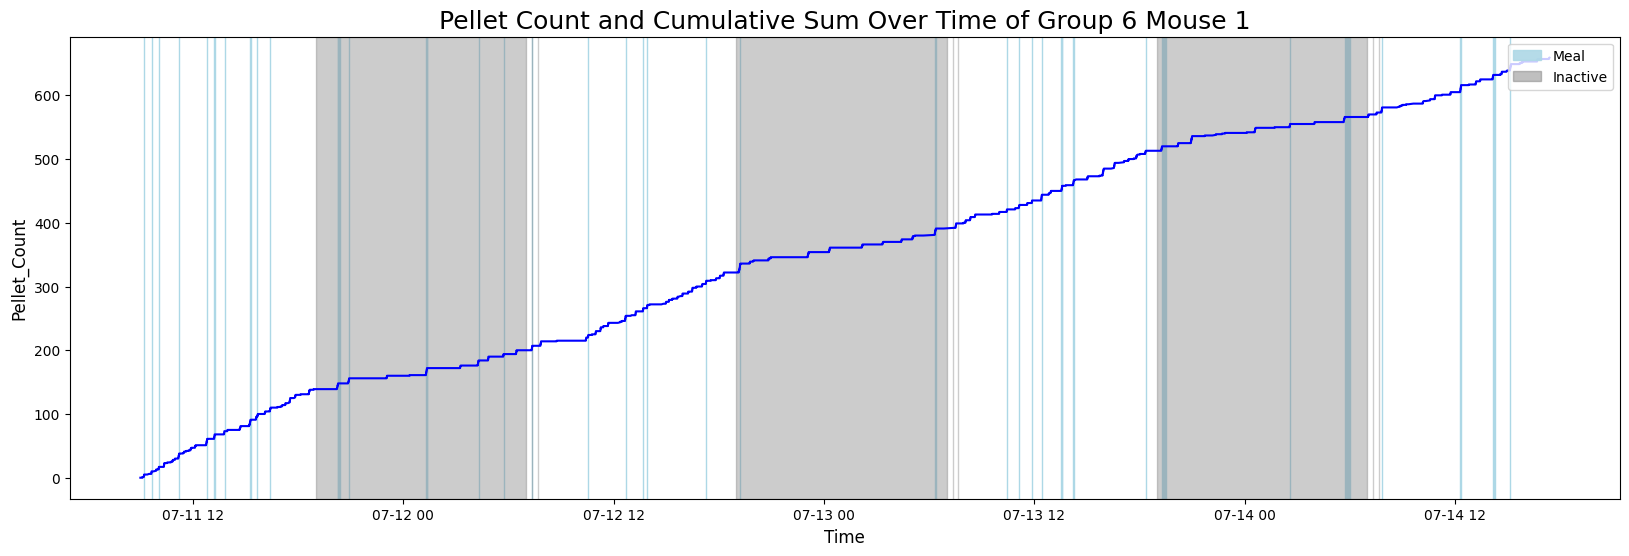

[100.0, 93.75, 26.666666666666668, 44.44444444444444, 100.0]


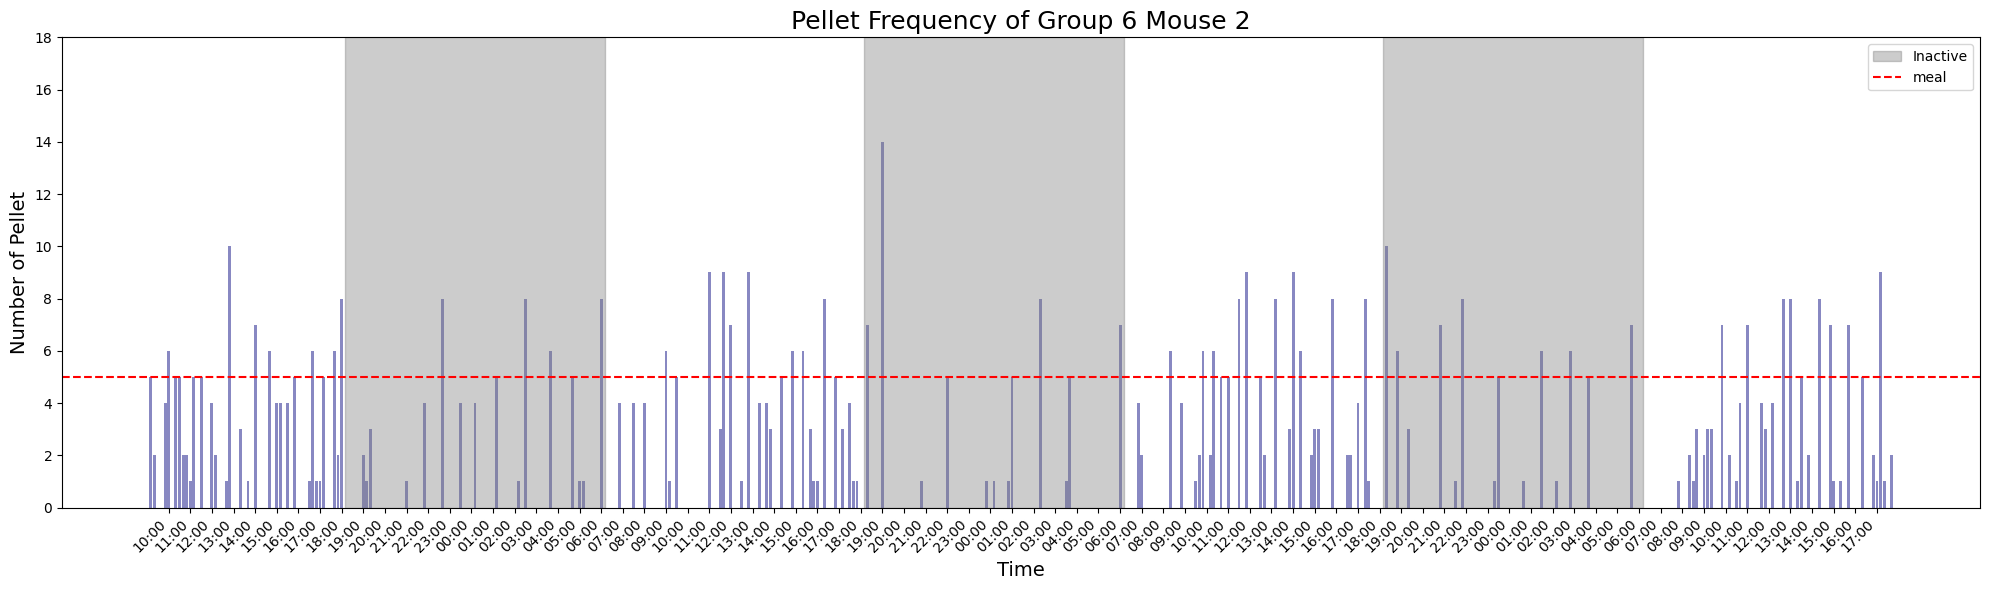

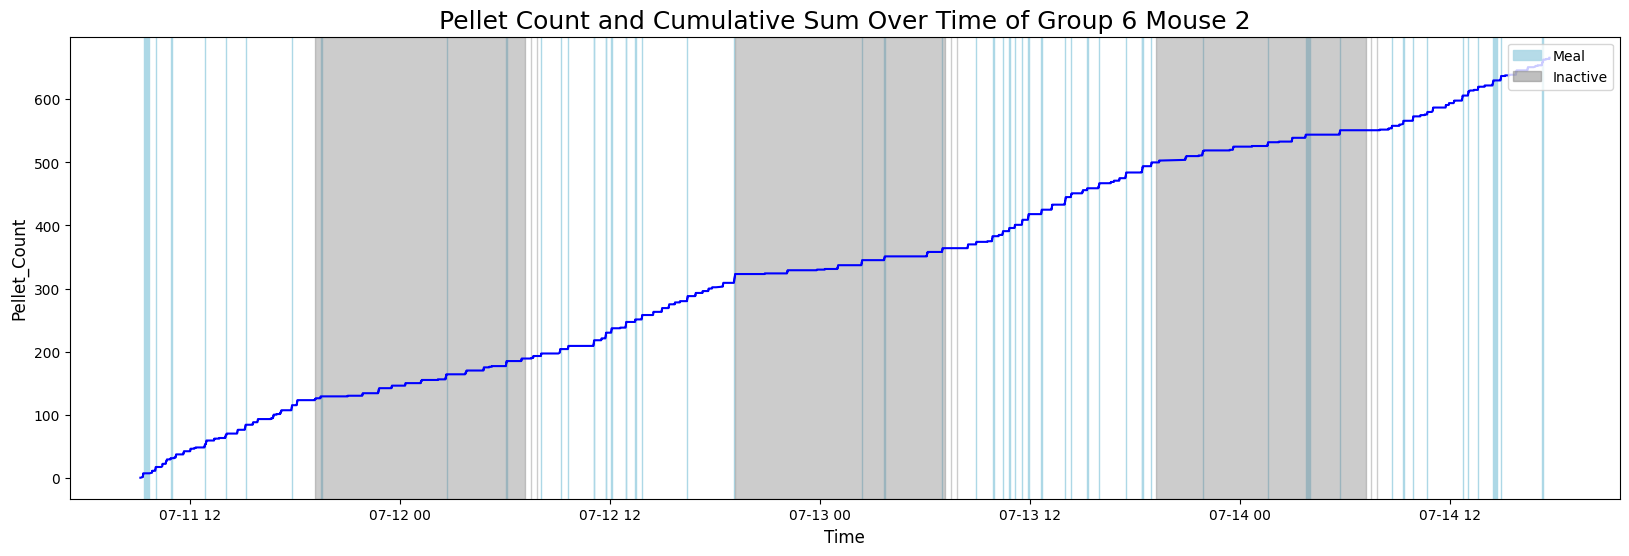

[46.666666666666664, 100.0, 66.66666666666666, 33.33333333333333, 54.54545454545454]


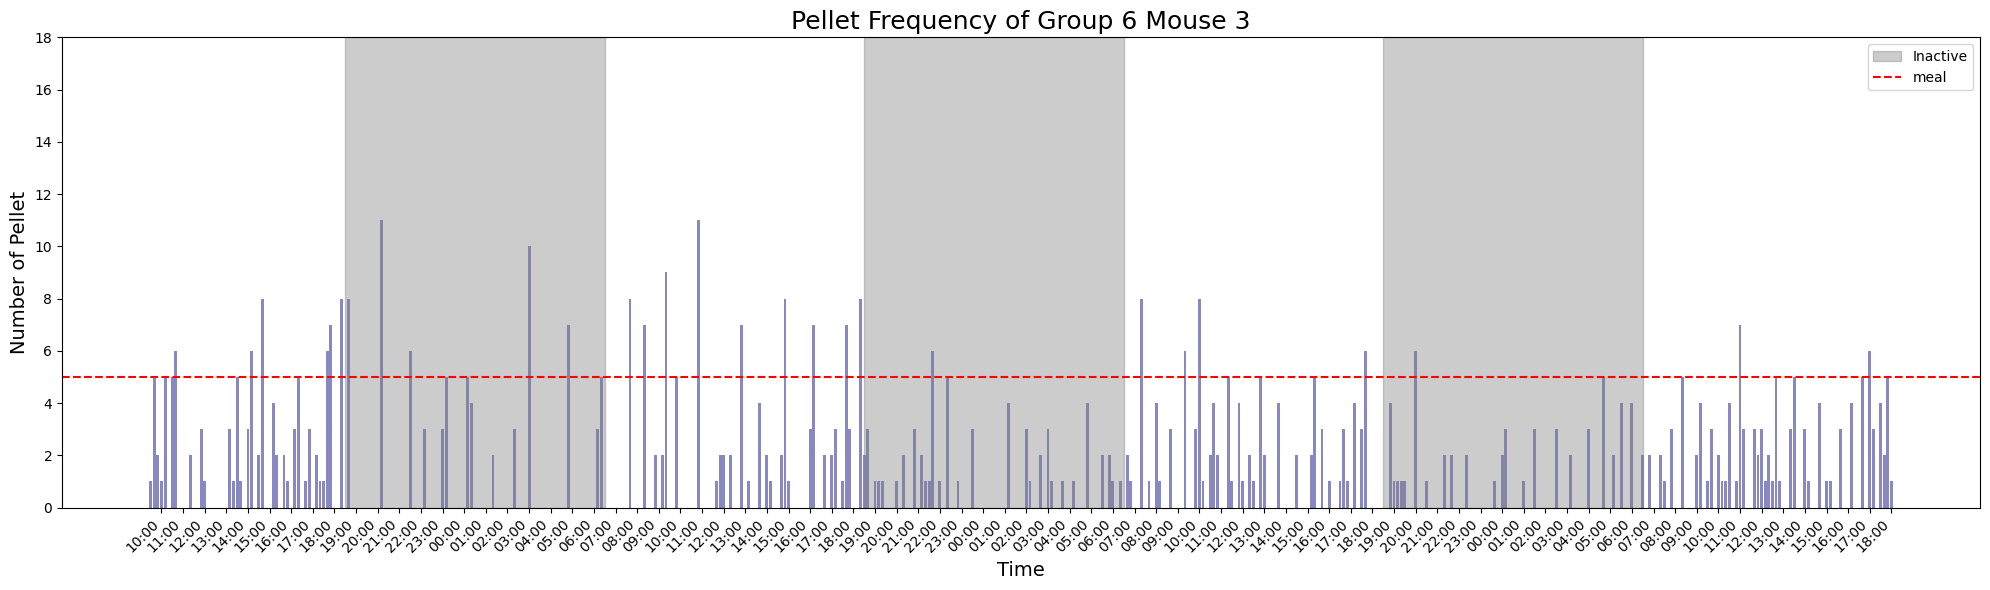

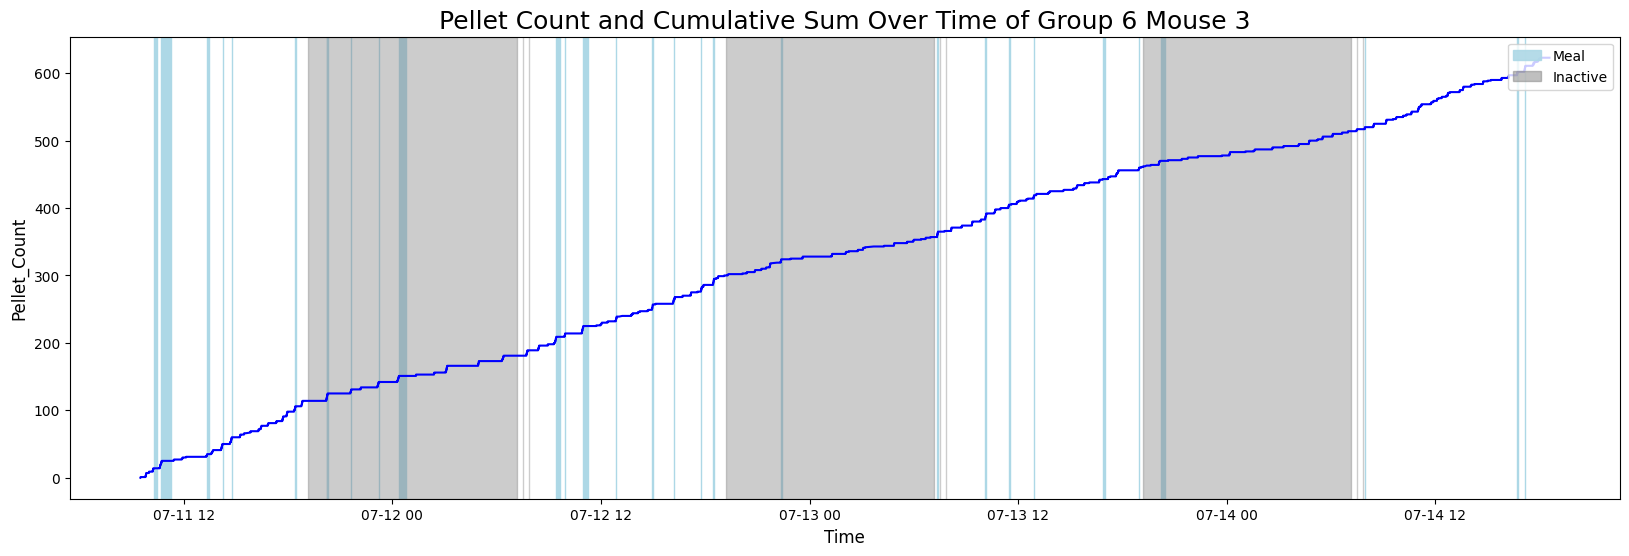

[18.181818181818183, 100.0, 26.666666666666668, 100.0, 100.0]


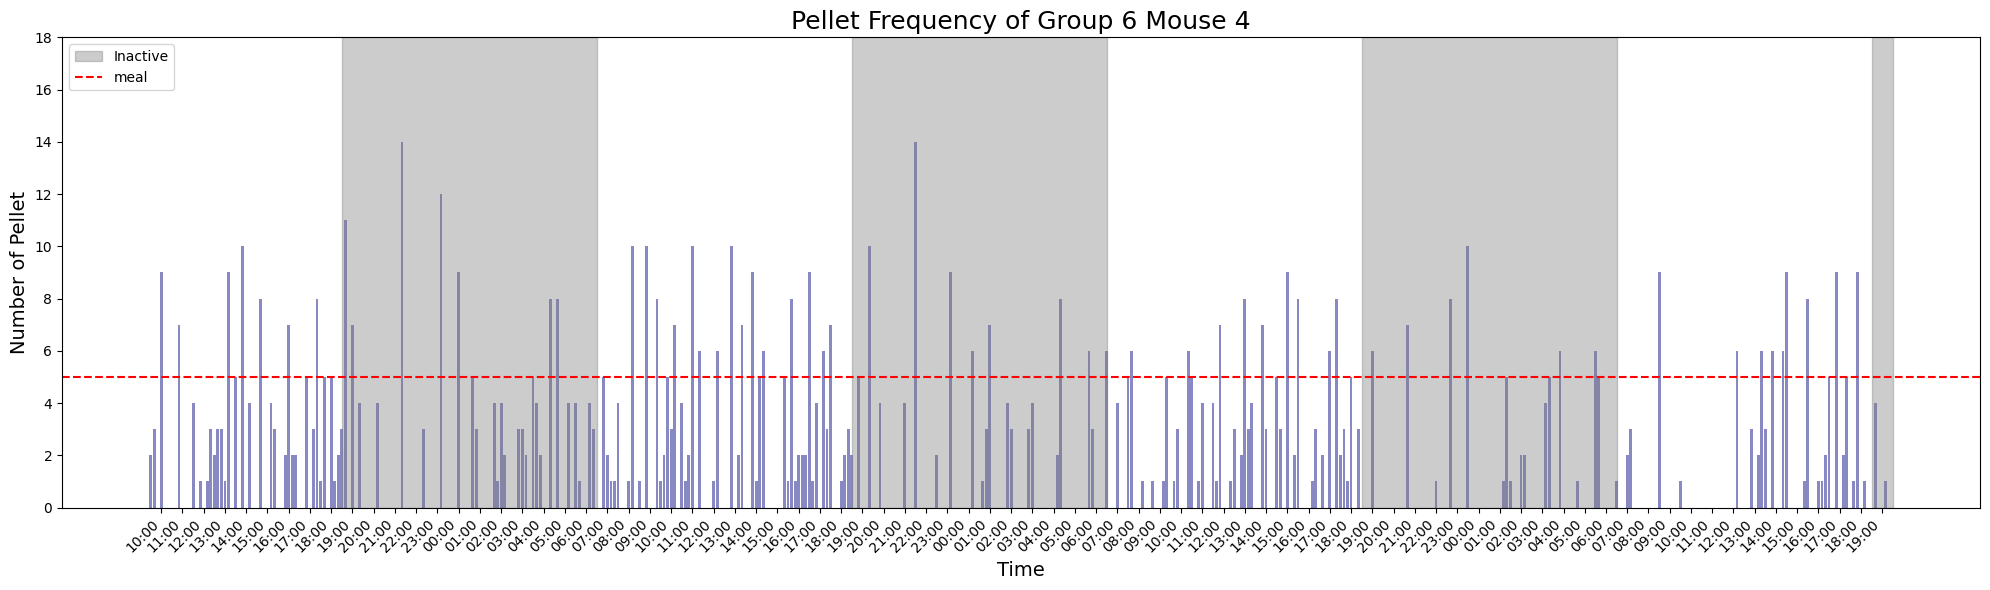

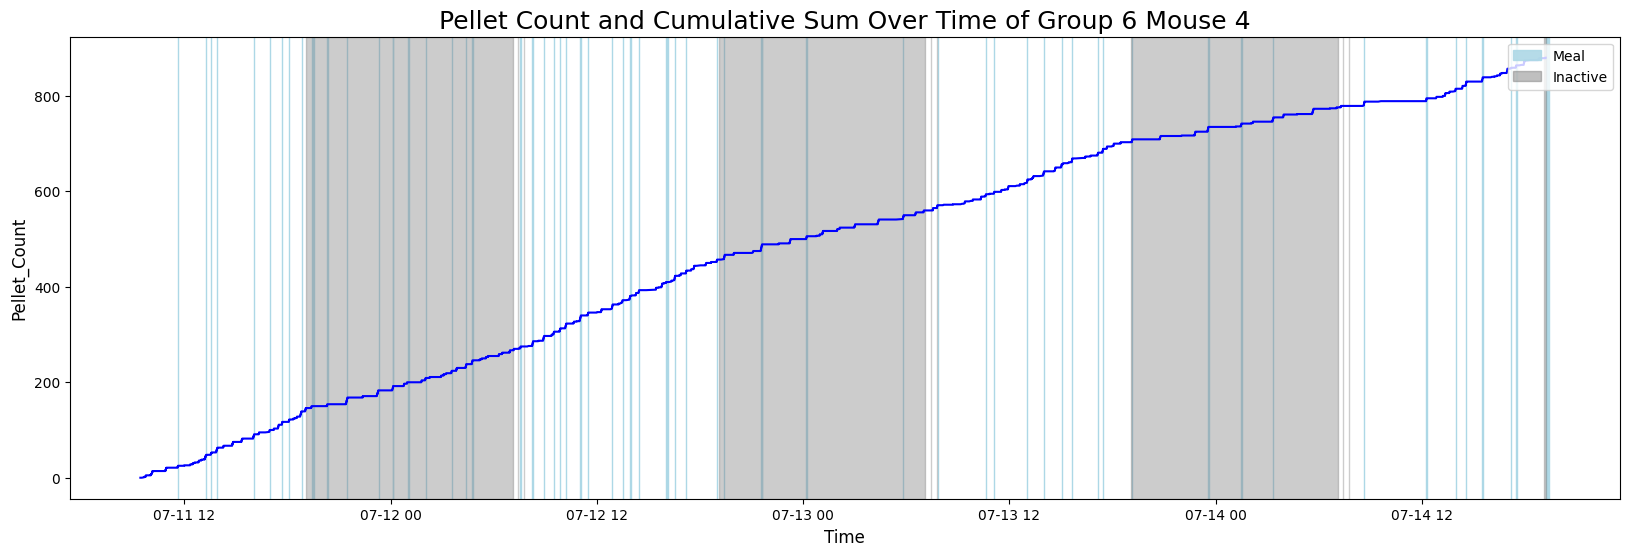

[100.0, 100.0, 85.71428571428571, 100.0, 100.0]


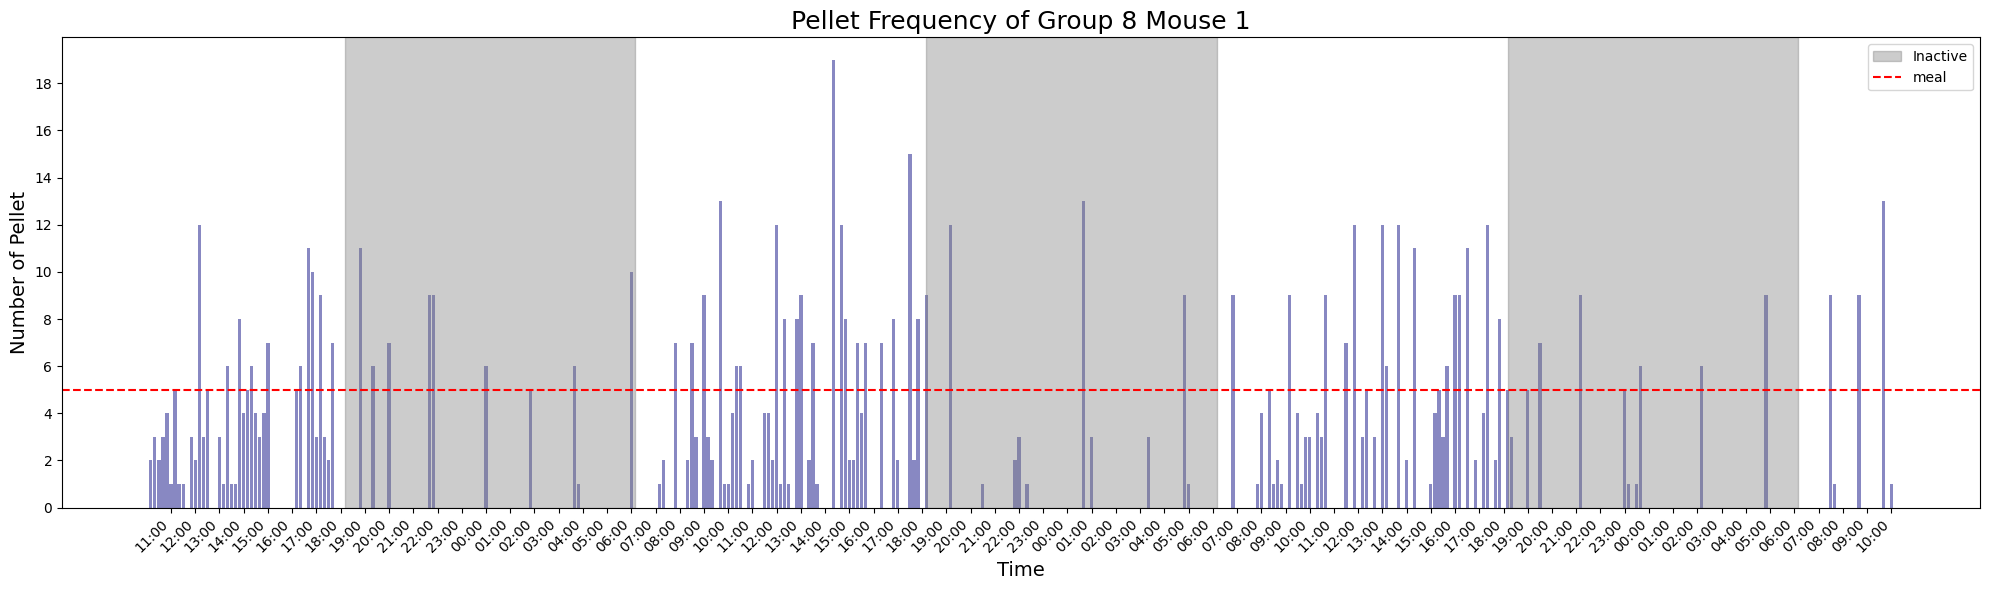

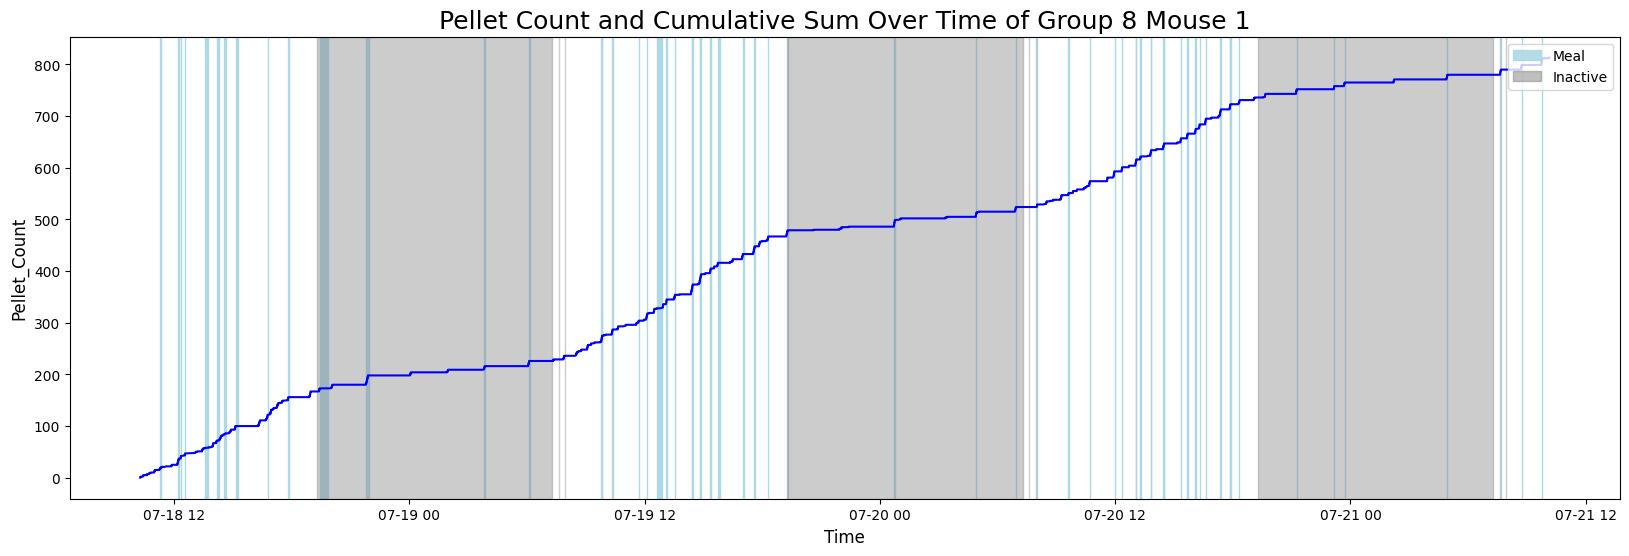

[100.0, 100.0, 25.53191489361702, 100.0, 71.42857142857143]


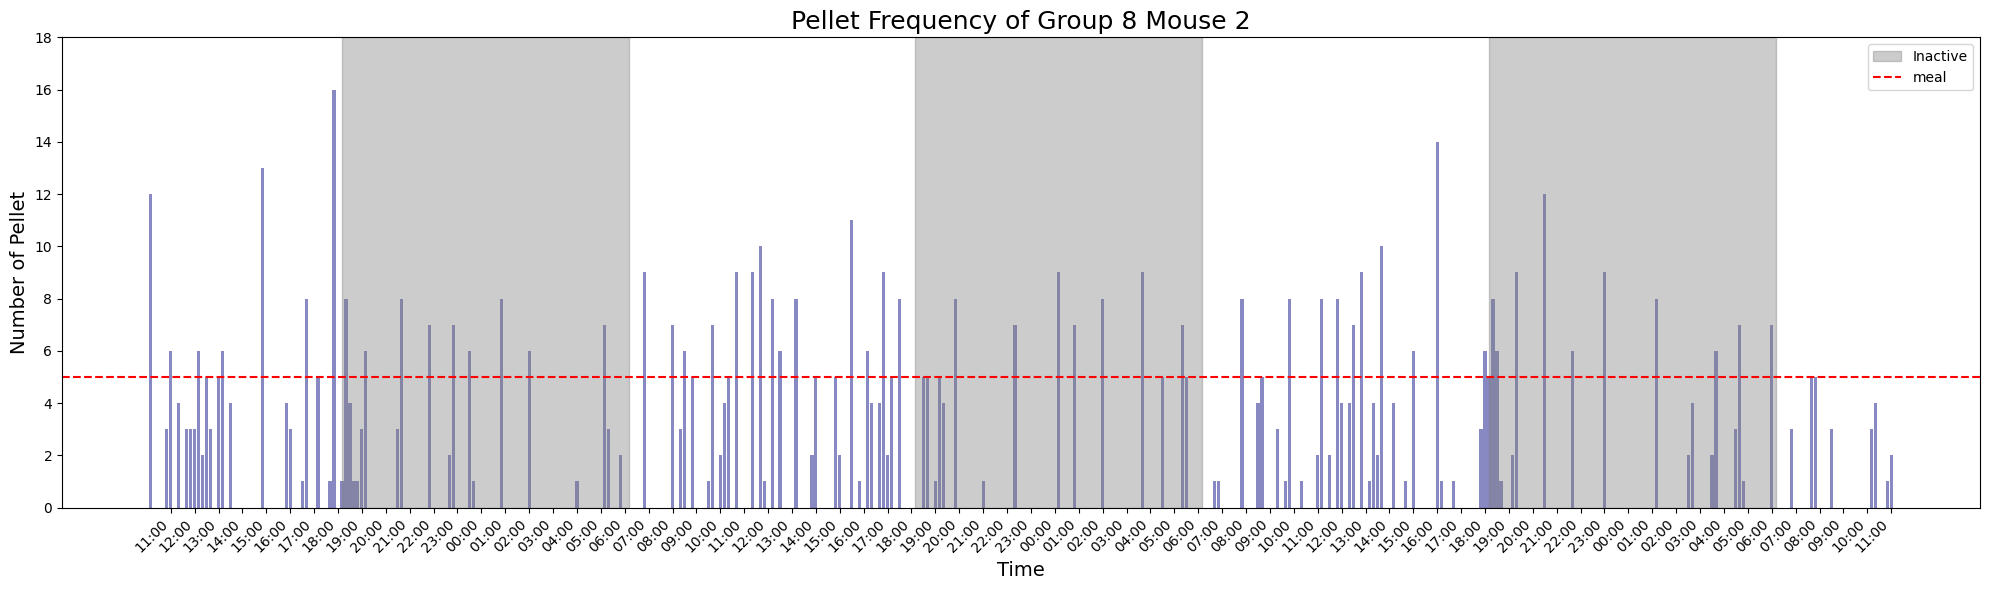

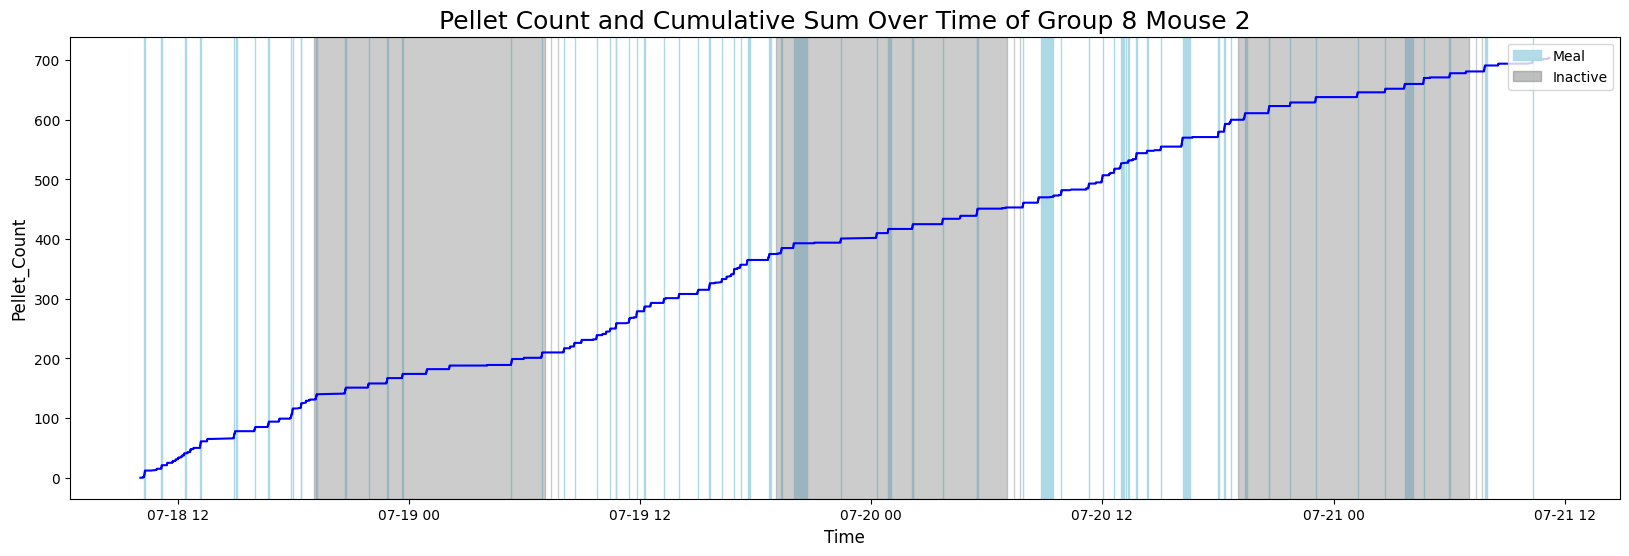

[41.17647058823529, 50.0, 80.0, 46.15384615384615, 70.0]


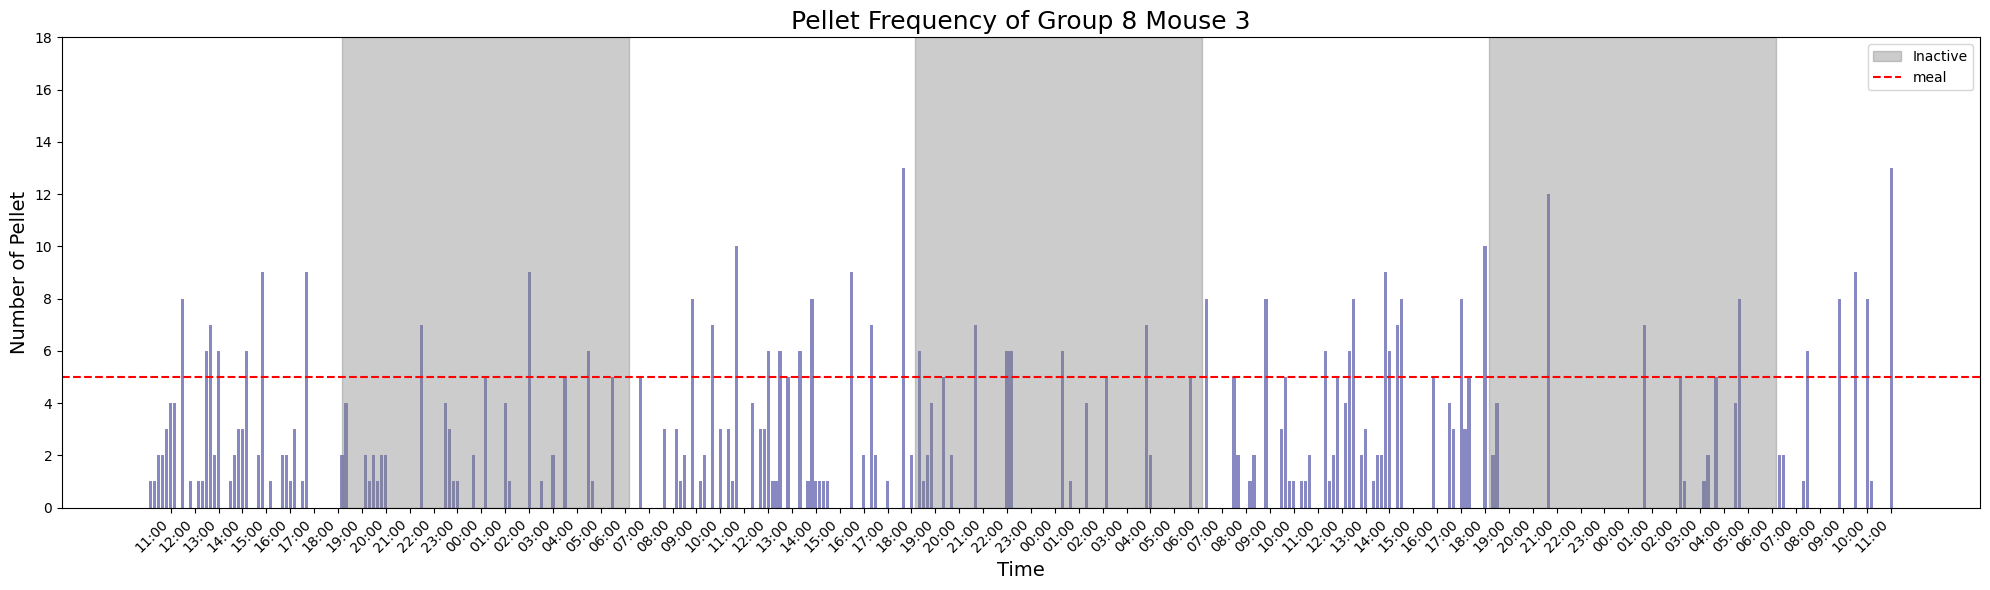

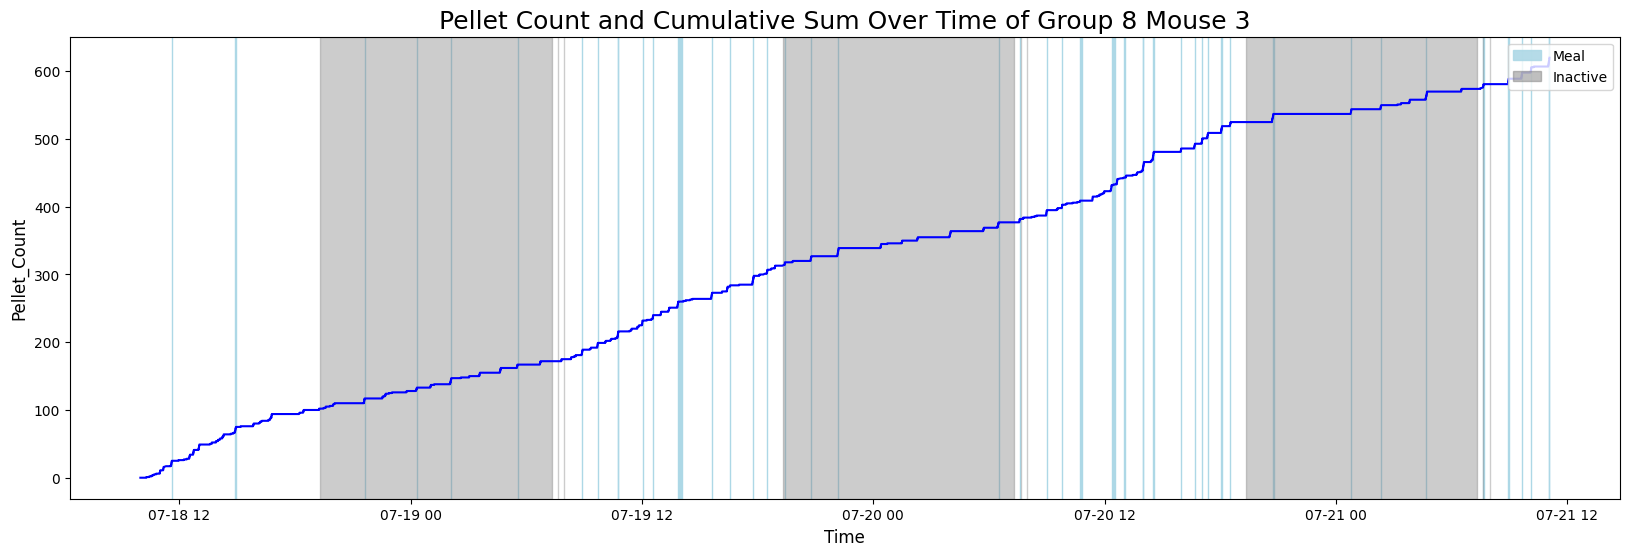

[70.58823529411765, 66.66666666666666, 46.15384615384615, 100.0, 44.642857142857146]


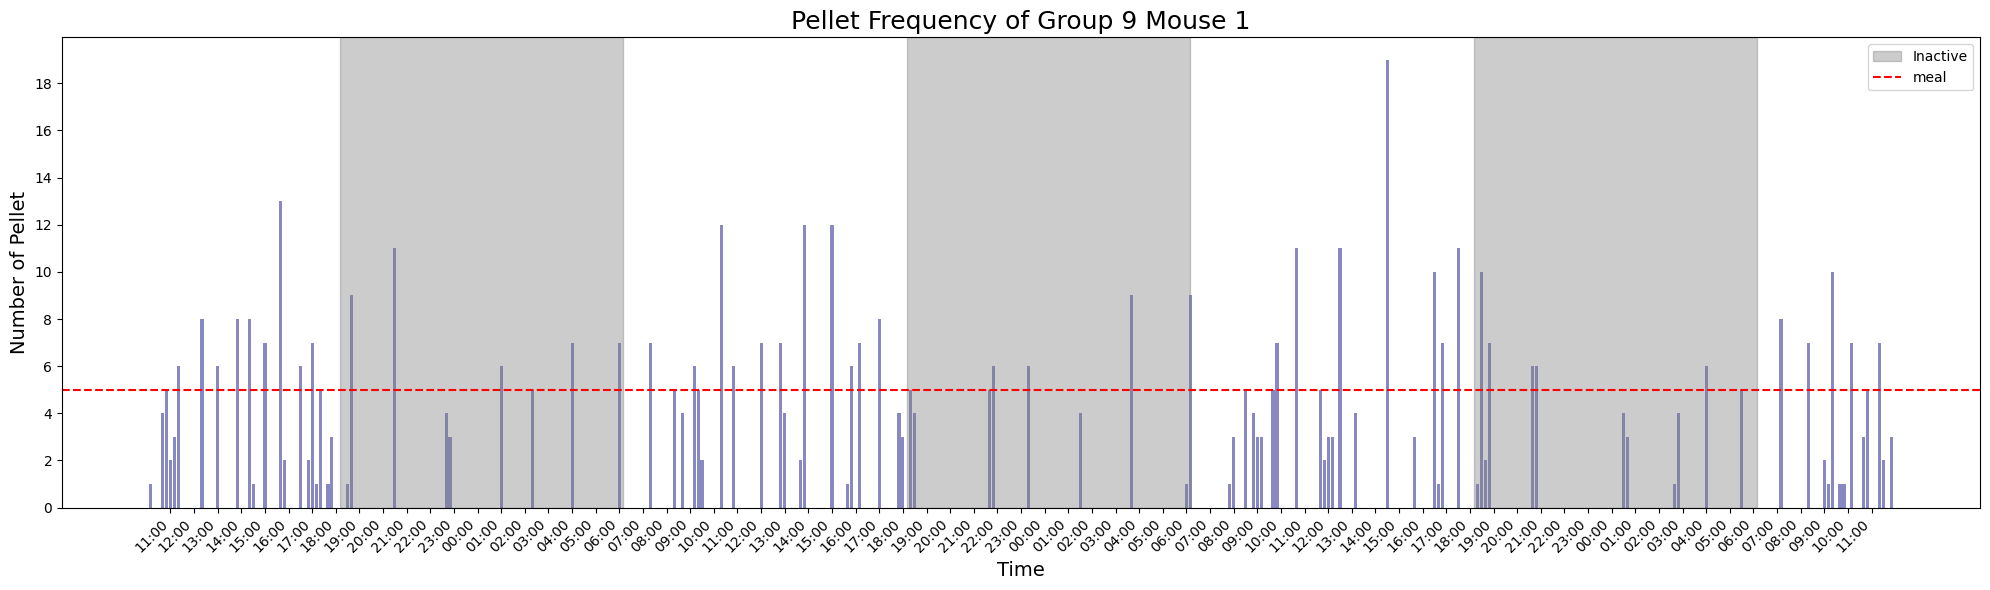

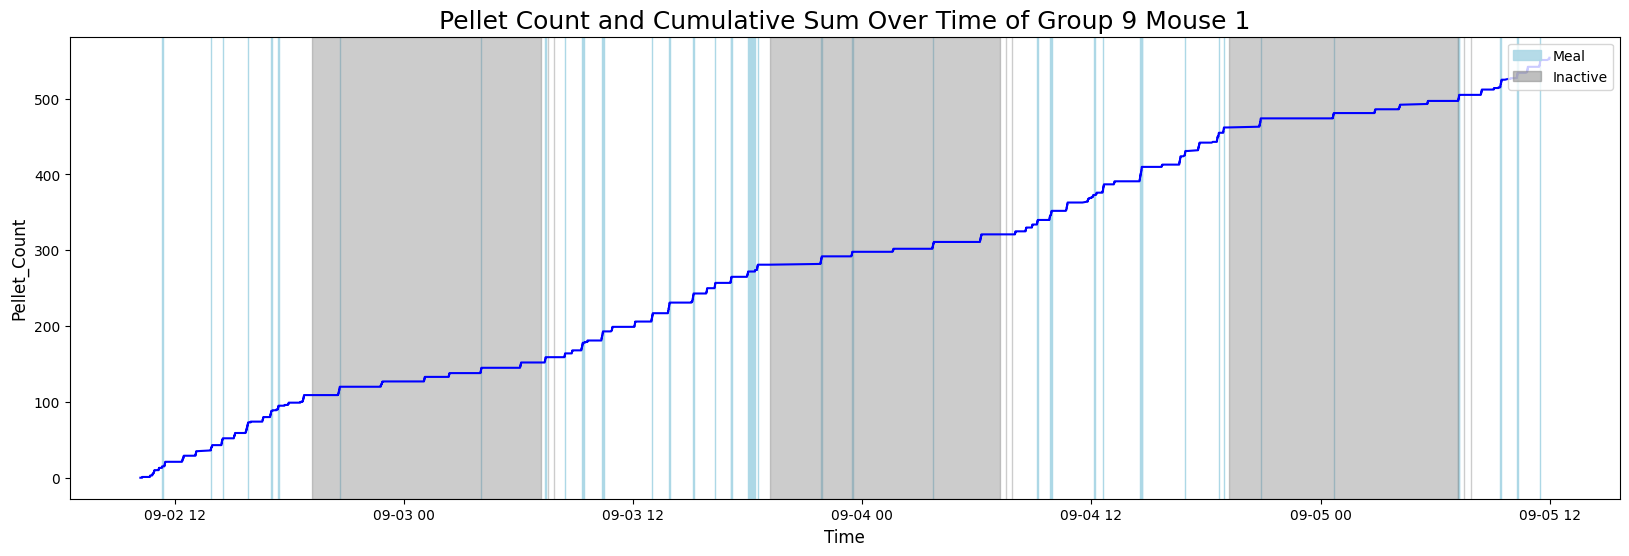

[58.333333333333336, 62.5, 68.42105263157895, 33.33333333333333, 47.61904761904761]


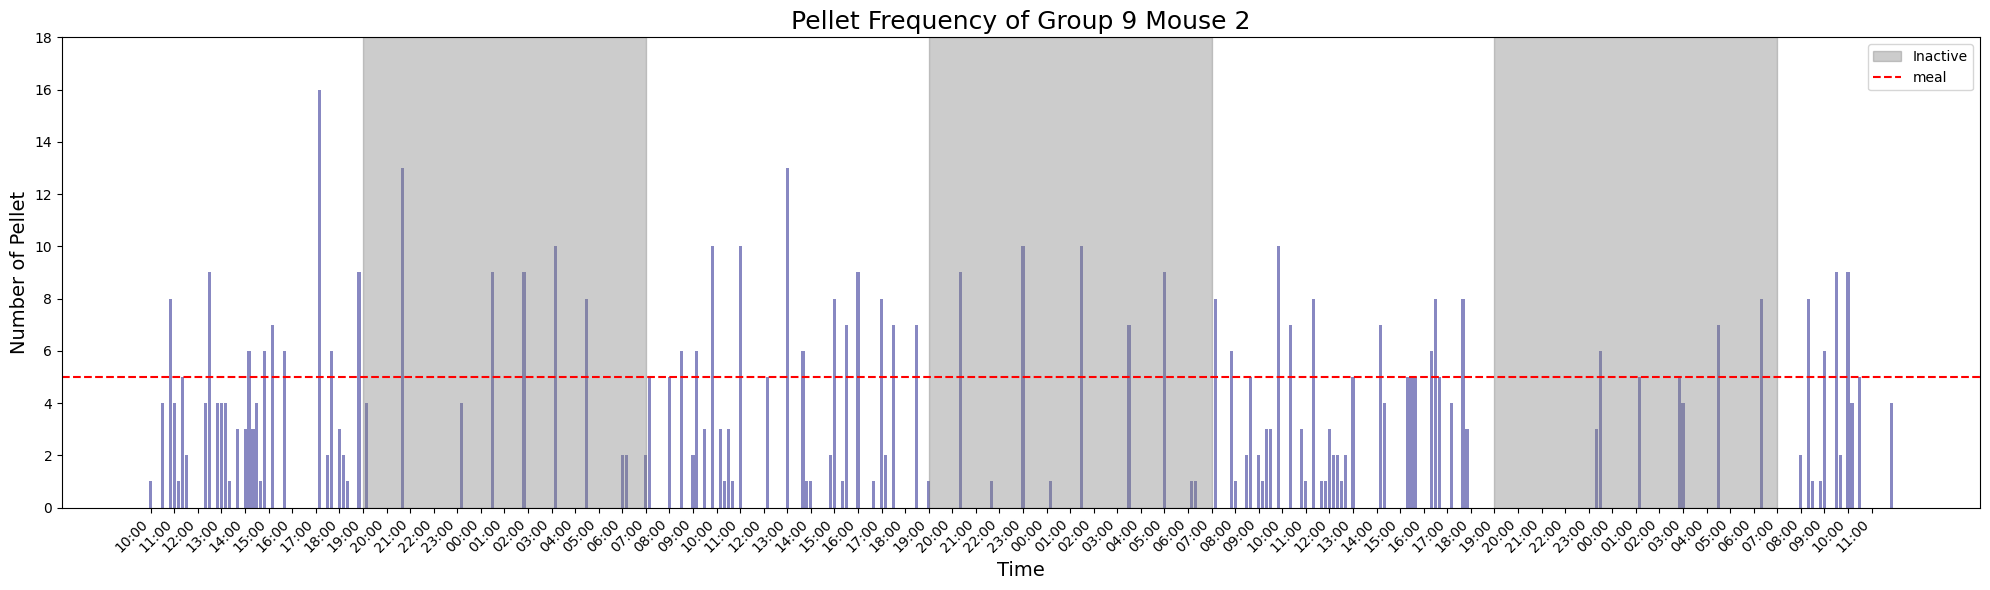

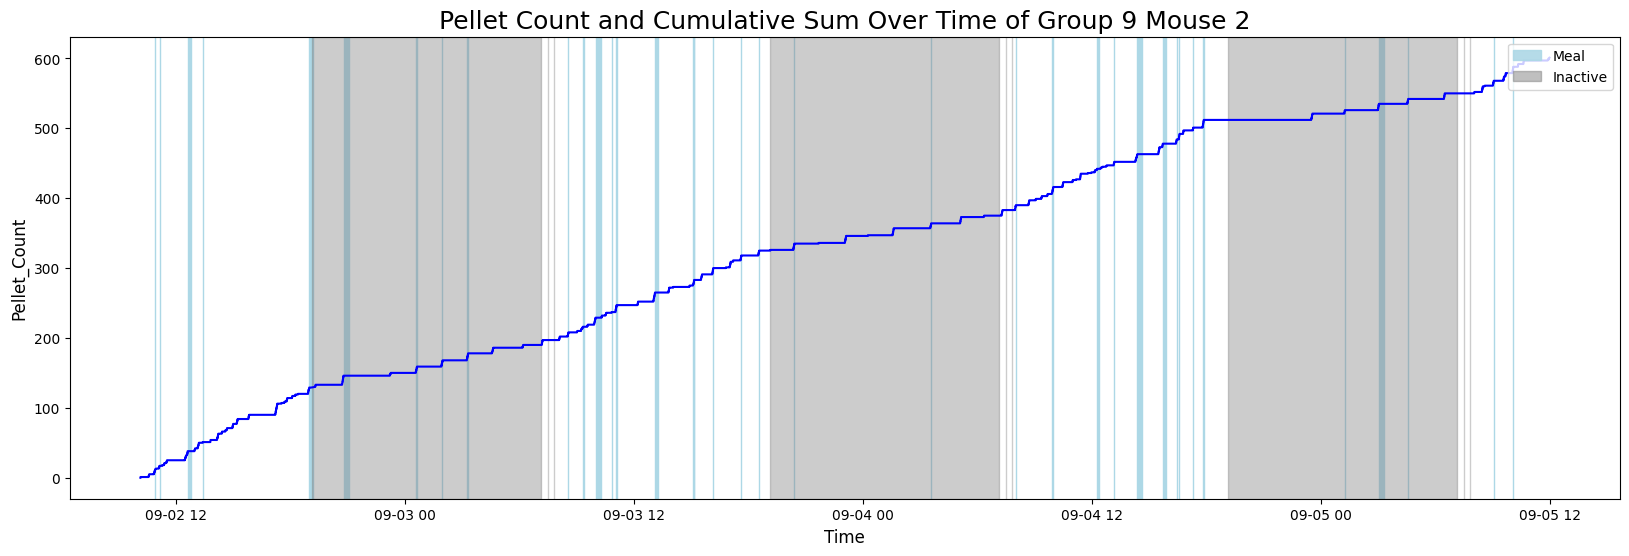

In [16]:
cask_avg_pellet = [] # pellet per hour
cask_dark_meals = [] # percentage of meals in inactive/dark phase
cask_fir_meal = []
flip_cask_meal_count = []

for path in paths.contigency_flip_cask:
    data = read_csv_clean(path, remove_trivial=False, collect_time=True)
    group = ml.pellet_flip(data)
    bhv, num = tl.get_bhv_num(path)
    # meal = ml.find_meals(data, pellet_count_threshold=pellet_count_threshold, 
    #                      collect_quantile=collect_quantile, pellet_quantile=pellet_quantile)
    meal, meal_pellet_cnt, meal_acc = ml.find_meals_paper(data, time_threshold=time_threshold, pellet_threshold=pellet_threshold)
    avg = round(len(meal) / ml.experiment_duration(data), 2)
    val_idx = next((i for i, x in enumerate(meal_acc) if x >= 60), -1) # find first meal that has >60% accuracy
    meal_1 = (meal[1][0] - data['Time'][0]).total_seconds() / 60
    cask_fir_meal.append(meal_1)
    flip_cask_meal_count.append(avg)
    cask_avg_pellet.append(ml.average_pellet(group))
    cask_dark_meals.append(ml.active_meal(meal))
    print(meal_acc[:5])

    ml.graph_pellet_frequency(group, bhv, num)
    ml.graphing_cum_count(data, meal, bhv, num, flip=True)

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import intervals as invs
import warnings

warnings.filterwarnings('ignore')
alpha = 0.1

### Meal Analysis

In [18]:
ctrl_light_meals = 1 - np.array(ctrl_dark_meals)
cask_light_meals = 1 - np.array(cask_dark_meals)

#### Inactive and active meal in group

In [19]:
invs.perform_T_test(ctrl_light_meals, ctrl_dark_meals)

P Value is  4.590327910608672e-08
There is a significant difference between the two groups.


In [20]:
invs.perform_T_test(cask_dark_meals, cask_light_meals)

P Value is  3.9198547472707535e-18
There is a significant difference between the two groups.


#### Average Meal Count per Day

In [21]:
invs.perform_T_test(flip_ctrl_meal_count, flip_cask_meal_count, test_side='greater')

P Value is  0.035003154546206
Experiment group is significantly greater than control group


#### Inactive and active meal between group

In [22]:
invs.perform_T_test(ctrl_dark_meals, cask_dark_meals, test_side='less')

P Value is  0.10305379671108504
There is no significant difference between the two groups.


* Mice have significant more meals in their active/day time
* No significant difference in the proportion of inactive meals between control and cask groups

### Average Pellet

Control Size: 6
CASK Size: 14
Control Average: 7.986833333333333
CASK Average: 9.299285714285714
Control Standard Deviation: 0.6854418769426527
CASK Standard Deviation: 1.3477232327477007


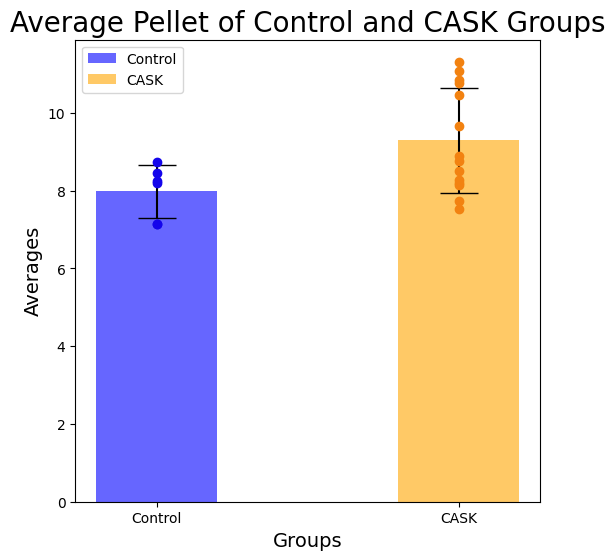

In [23]:
ml.graph_group_stats(ctrl_avg_pellet, cask_avg_pellet, stats_name='Average Pellet', exp_name='CASK')

In [24]:
invs.perform_T_test(ctrl_avg_pellet, cask_avg_pellet, test_side='greater')

P Value is  0.01898857483032484
Experiment group is significantly greater than control group


#### Time needed to start the first meal

Control Size: 6
CASK Size: 14
Control Average: 96.86166666666666
CASK Average: 101.24952380952381
Control Standard Deviation: 34.75232128138269
CASK Standard Deviation: 87.71677906575417


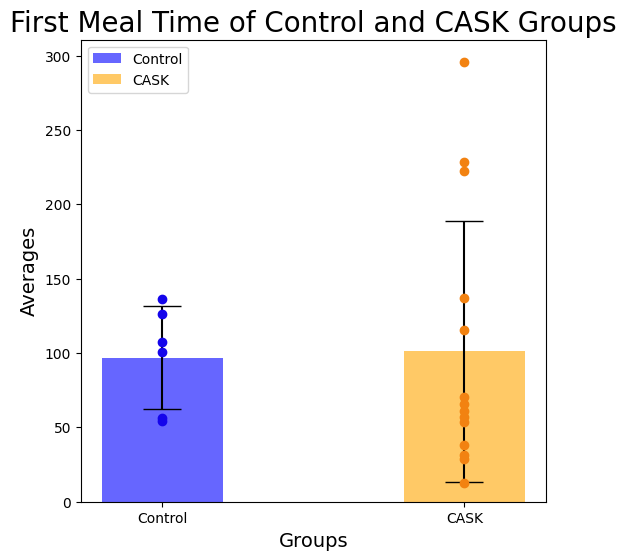

In [25]:
ml.graph_group_stats(ctrl_fir_meal, cask_fir_meal, stats_name='First Meal Time',exp_name='CASK')

In [26]:
invs.perform_T_test(ctrl_fir_meal, cask_fir_meal, test_side='less')

P Value is  0.5459794862580813
There is no significant difference between the two groups.


* Average Interval also matches the FR1 case that experimental group has larger variance in average intervals.
* no significance difference between all average intervals